# CNNs for Intrusion Detection

###### (work in progress)

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits import mplot3d
import warnings

warnings.filterwarnings('ignore')

#### Data Exploration

In [ ]:
df=pd.read_csv('/content/kdd_test.csv')
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,labels
0,5,tcp,smtp,SF,2429,475,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0.0,0.0,0.0,0.0,1.00,0.00,0.00,180,57,0.11,0.02,0.01,0.04,0.0,0.0,0.87,0.0,normal
1,0,udp,domain_u,SF,45,134,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,192,269,0.0,0.0,0.0,0.0,0.99,0.01,0.01,194,155,0.80,0.02,0.01,0.00,0.0,0.0,0.00,0.0,normal
2,0,udp,domain_u,SF,45,80,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,121,121,0.0,0.0,0.0,0.0,1.00,0.00,0.00,255,255,1.00,0.00,0.01,0.00,0.0,0.0,0.00,0.0,normal
3,1979,udp,other,SF,145,105,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,0.0,0.0,1.00,0.00,0.00,255,2,0.01,0.84,1.00,0.00,0.0,0.0,0.00,0.0,normal
4,14462,tcp,other,RSTR,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0.0,0.0,1.0,1.0,1.00,0.00,0.00,255,2,0.01,0.68,1.00,0.00,0.0,0.0,1.00,1.0,portsweep


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22544 entries, 0 to 22543
Data columns (total 42 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   duration                     22544 non-null  int64  
 1   protocol_type                22544 non-null  object 
 2   service                      22544 non-null  object 
 3   flag                         22544 non-null  object 
 4   src_bytes                    22544 non-null  int64  
 5   dst_bytes                    22544 non-null  int64  
 6   land                         22544 non-null  int64  
 7   wrong_fragment               22544 non-null  int64  
 8   urgent                       22544 non-null  int64  
 9   hot                          22544 non-null  int64  
 10  num_failed_logins            22544 non-null  int64  
 11  logged_in                    22544 non-null  int64  
 12  num_compromised              22544 non-null  int64  
 13  root_shell      

How many classes and how many values per class:

number of classes: 36



normal             11245
neptune             6654
satan                698
smurf                540
ipsweep              479
guess_passwd         411
portsweep            371
mscan                310
warezmaster          279
apache2              228
back                 227
processtable         211
nmap                 206
warezclient          107
teardrop             104
snmpguess             99
mailbomb              94
saint                 93
snmpgetattack         43
httptunnel            41
pod                   35
buffer_overflow       17
multihop               9
ps                     9
sendmail               8
loadmodule             4
xlock                  4
rootkit                4
xterm                  3
imap                   2
named                  2
ftp_write              2
land                   2
xsnoop                 1
perl                   1
phf                    1
Name: labels, dtype: int64

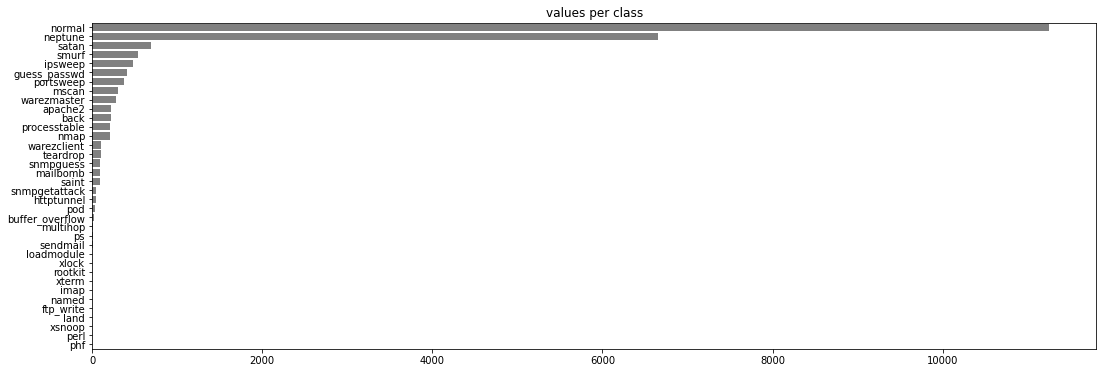

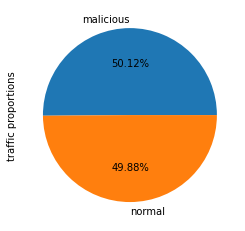

In [ ]:
print('number of classes:', df['labels'].nunique())
print('')
label_counts = df['labels'].value_counts()
plt.figure(figsize=(18,6));
sns.barplot(y=label_counts.index, x=label_counts.values, color='Grey');
plt.title('values per class');
display(label_counts)

#binary traffic proportions
binary_class = []
for label in df['labels']:
    if label !='normal':
        binary_class.append('malicious')
    else:
        binary_class.append('normal')
binary_class = pd.Series(binary_class)
plt.figure()
binary_class.value_counts().plot(kind='pie', label='traffic proportions', autopct='%.2f%%' );

Unique values and value counts of categorical variables:

In [ ]:
df['protocol_type'].value_counts()

tcp     18508
udp      2701
icmp     1335
Name: protocol_type, dtype: int64

In [ ]:
df['service'].value_counts()

http        7307
private     4185
domain_u    1435
smtp        1180
ftp_data    1067
            ... 
tim_i          5
pm_dump        5
urh_i          3
red_i          2
aol            1
Name: service, Length: 66, dtype: int64

In [ ]:
#how many different categories in column 'service'
print('number of categories in column \'service\':', df['service'].nunique())

number of categories in column 'service': 66


In [ ]:
df['flag'].value_counts()

SF        13803
S0         4993
REJ        2596
RSTR        489
RSTO        447
S3           79
SH           55
S1           46
S2           20
RSTOS0       12
OTH           4
Name: flag, dtype: int64

Numerical features--> summary statistics, distribution boxenplots (per class), feature means (per class), and correlation heatmap:

In [ ]:
#summary statistics
display(df.iloc[:,:10].describe())
display(df.iloc[:,10:17].describe())
display(df.iloc[:,17:24].describe())
display(df.iloc[:,24:31].describe())
display(df.iloc[:,31:36].describe())
display(df.iloc[:,36:].describe())

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot
count,22544.000000,2.254400e+04,2.254400e+04,22544.000000,22544.000000,22544.000000,22544.000000
mean,258.858499,1.226873e+04,2.966787e+03,0.000089,0.016989,0.000177,0.155562
std,2184.355090,4.665783e+05,6.293205e+04,0.009419,0.217507,0.016313,1.699324
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000
50%,0.000000,4.500000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.750000e+02,5.950000e+02,0.000000,0.000000,0.000000,0.000000
max,54451.000000,6.282565e+07,5.153771e+06,1.000000,3.000000,2.000000,30.000000


,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations
count,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000
mean,0.008783,0.406095,0.259359,0.002040,0.001065,0.278034,0.009226
std,0.104942,0.491114,11.370701,0.045126,0.045160,12.577777,0.369397
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,5.000000,1.000000,796.000000,1.000000,2.000000,878.000000,43.000000


,num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count
count,22544.000000,22544.000000,22544.0,22544.000000,22544.000000,22544.000000,22544.000000
mean,0.000710,0.004125,0.0,0.000044,0.014594,83.706840,28.981769
std,0.031232,0.097572,0.0,0.006660,0.119922,119.550577,78.419968
min,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.0,0.000000,0.000000,2.000000,2.000000
50%,0.000000,0.000000,0.0,0.000000,0.000000,12.000000,7.000000
75%,0.000000,0.000000,0.0,0.000000,0.000000,140.000000,17.000000
max,2.000000,8.000000,0.0,1.000000,1.000000,511.000000,511.000000


,serror_rate,srv_serror_rate,rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate
count,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000
mean,0.230727,0.229840,0.157362,0.157140,0.681482,0.072189,0.094348
std,0.415721,0.416817,0.357695,0.359364,0.434233,0.206945,0.254145
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
75%,0.070000,0.000000,0.000000,0.000000,1.000000,0.060000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate
count,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000
mean,186.878549,123.129613,0.545571,0.084905,0.141117
std,97.508604,111.577695,0.447079,0.199813,0.305538
min,1.000000,1.000000,0.000000,0.000000,0.000000
25%,95.000000,12.000000,0.050000,0.000000,0.000000
50%,255.000000,85.000000,0.670000,0.020000,0.000000
75%,255.000000,255.000000,1.000000,0.070000,0.050000
max,255.000000,255.000000,1.000000,1.000000,1.000000


,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000
mean,0.028275,0.229375,0.225729,0.155008,0.153560
std,0.105966,0.410665,0.412500,0.339255,0.350511
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.010000,0.100000,0.010000,0.010000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
numeric_columns = []
categorical_columns = []
for column in df.columns:
    if df[column].dtype != 'object':
        numeric_columns.append(column)
    else:
        categorical_columns.append(column)

categorical_columns = categorical_columns[:-1]       
labels=df['labels'].unique()

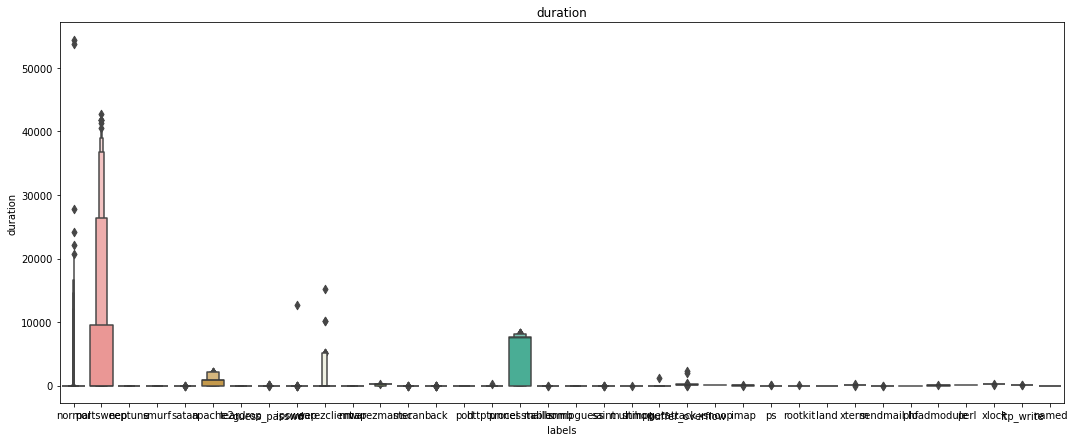

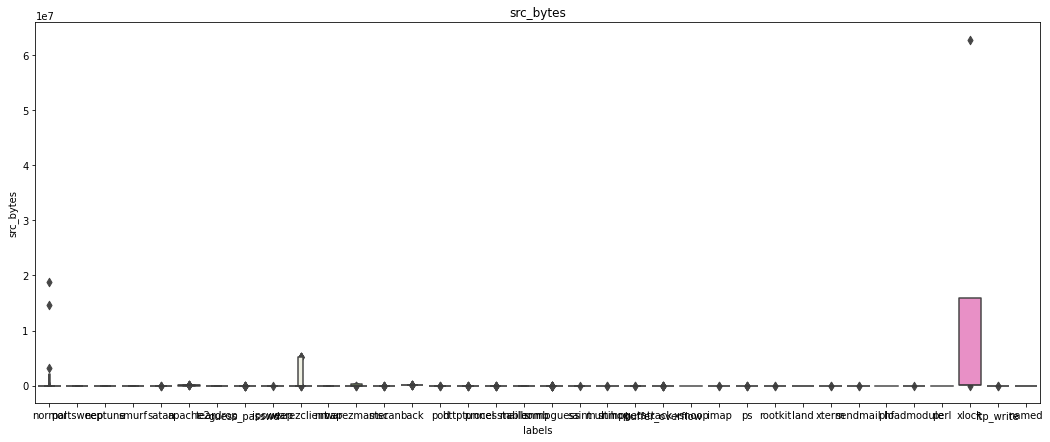

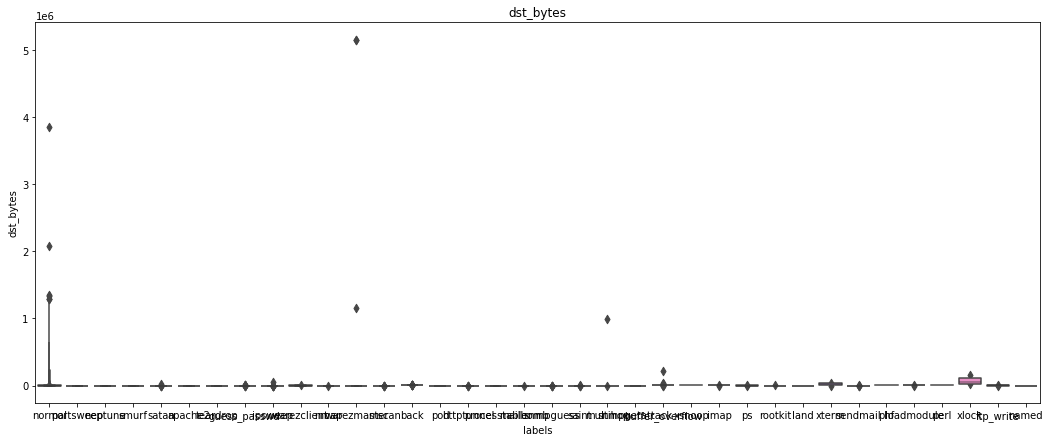

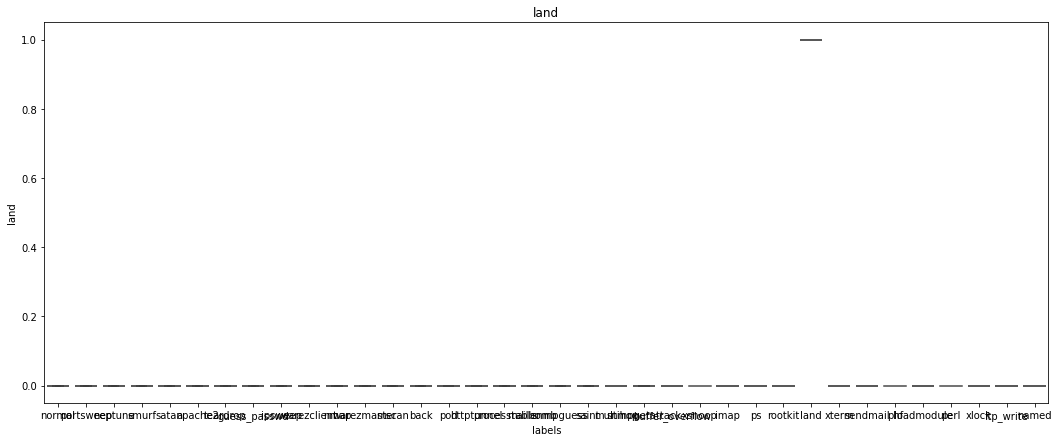

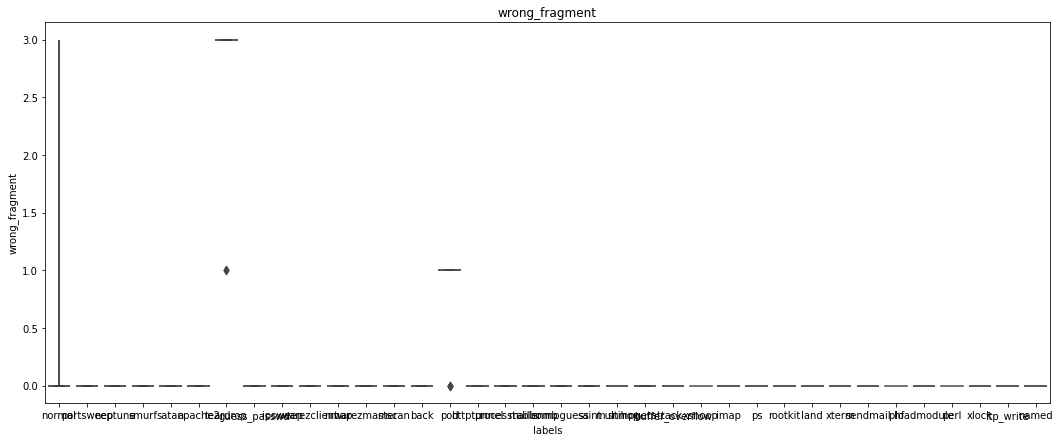

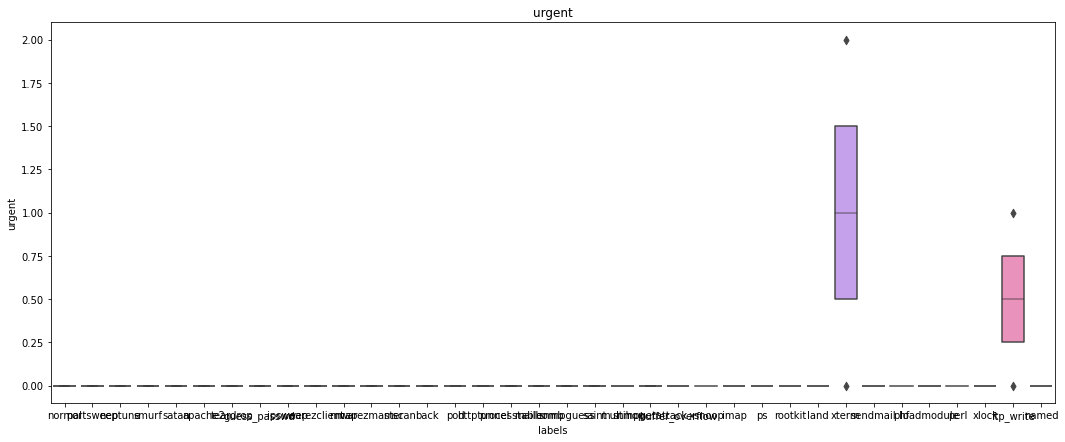

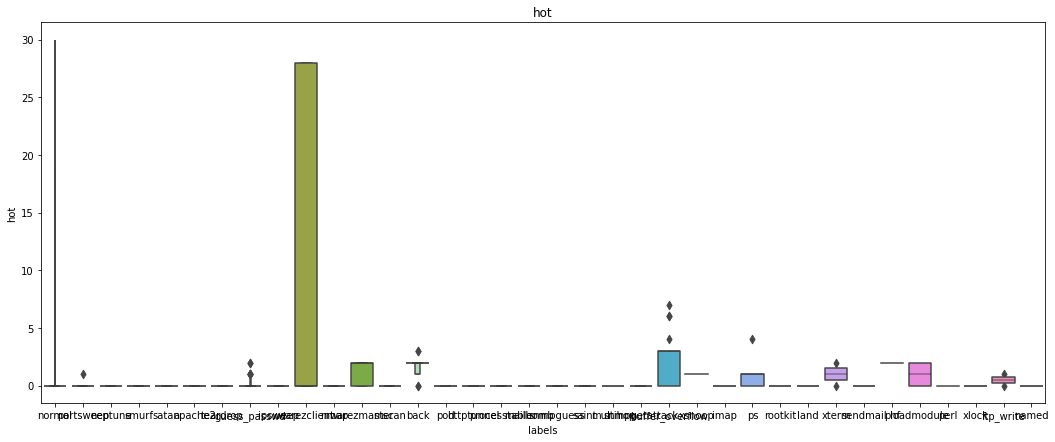

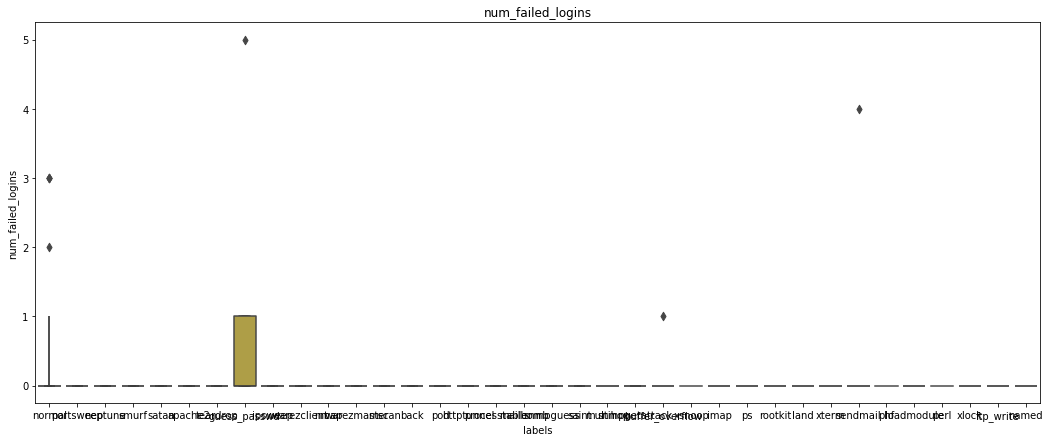

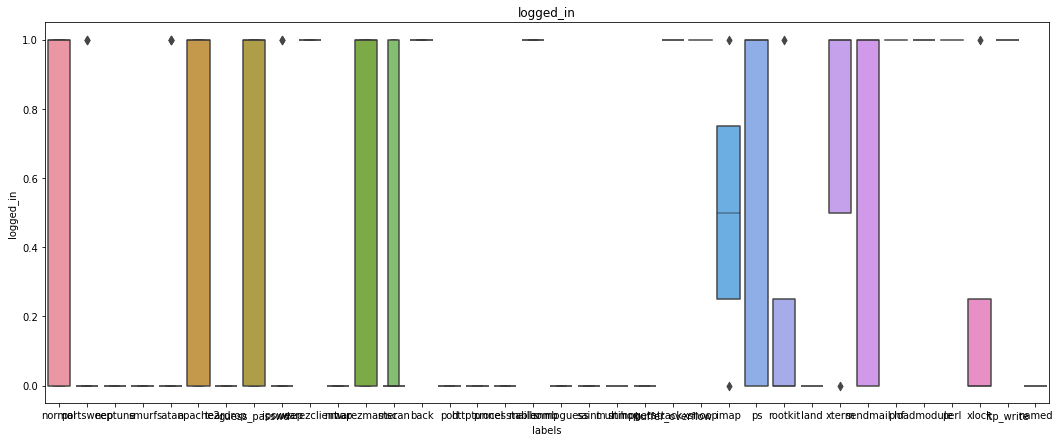

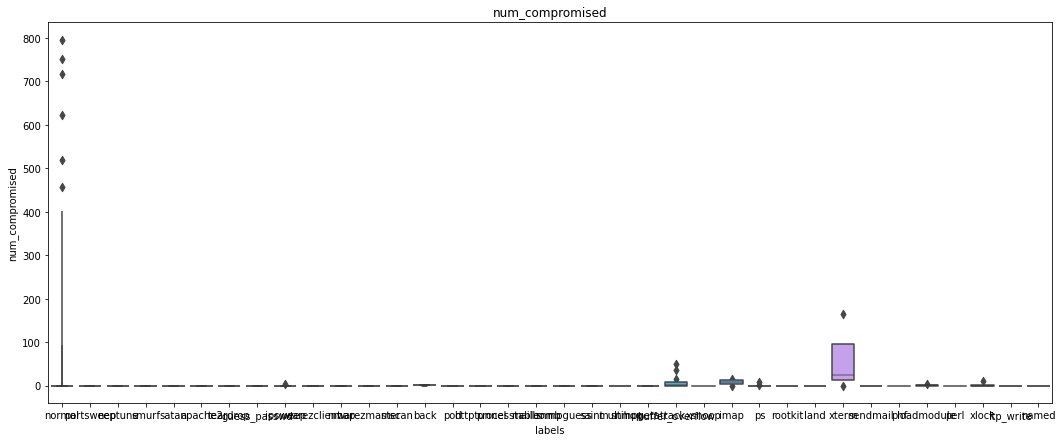

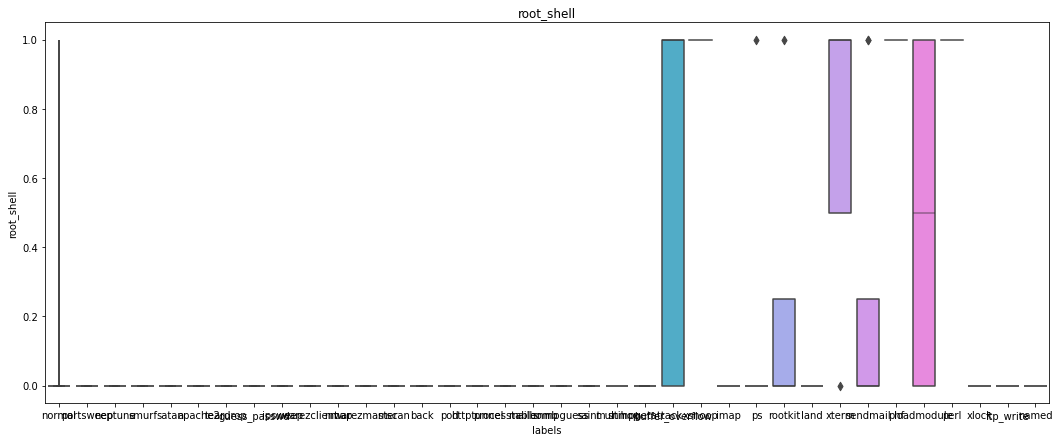

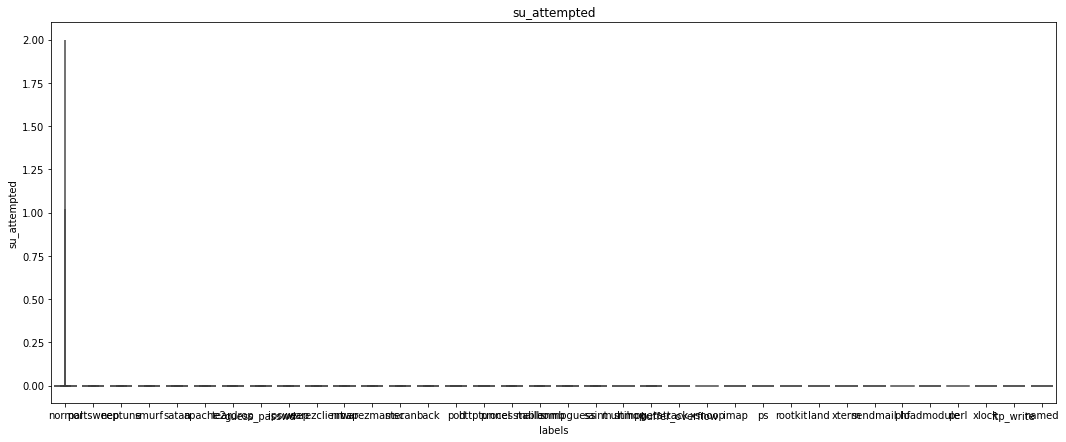

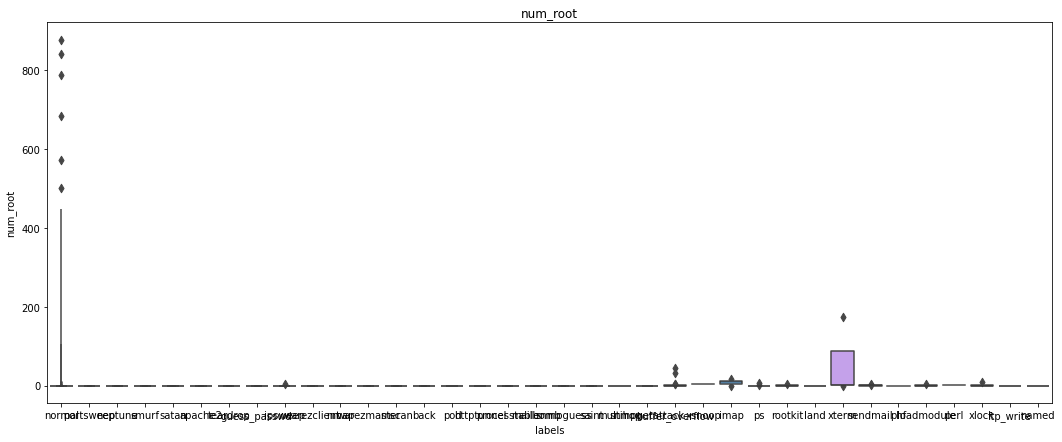

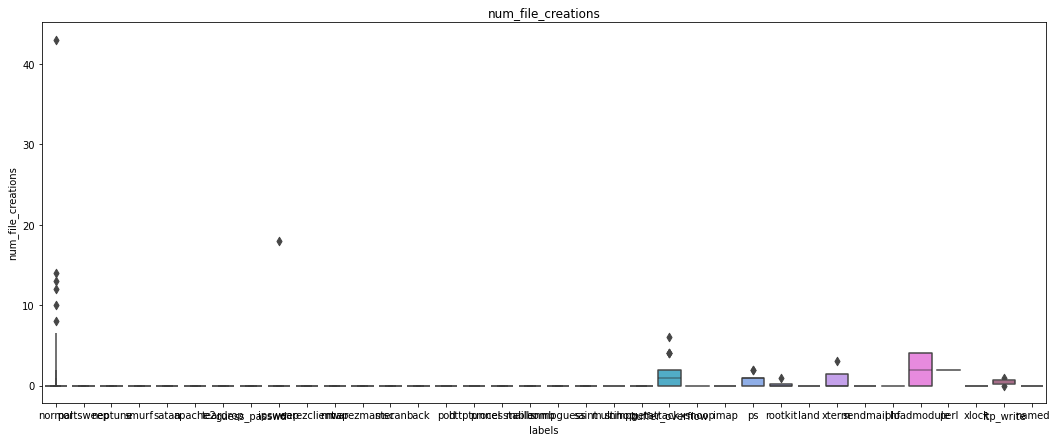

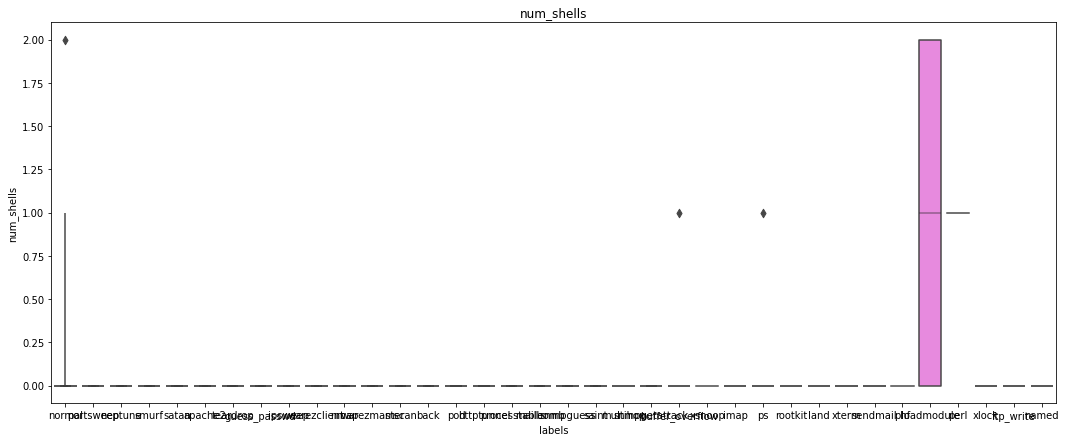

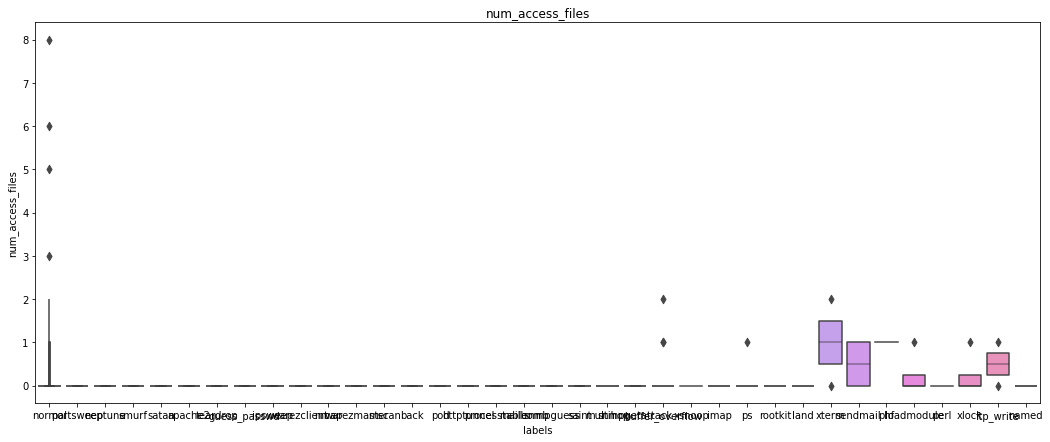

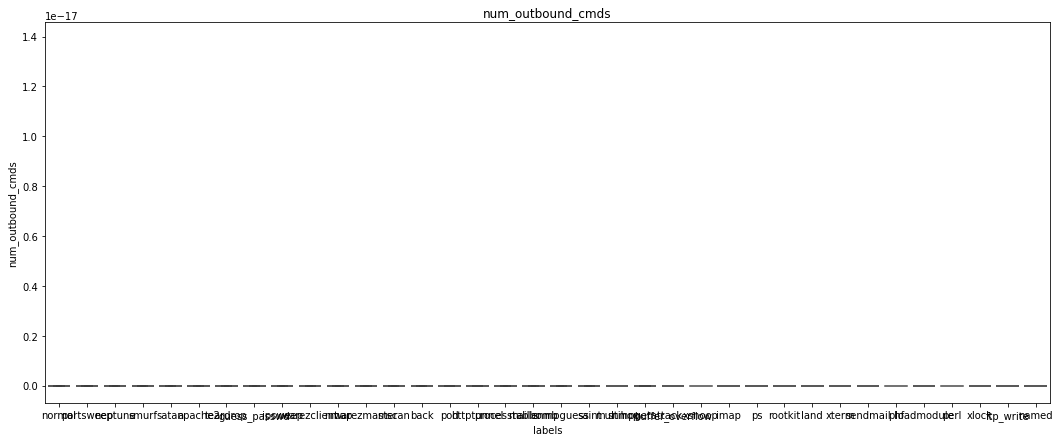

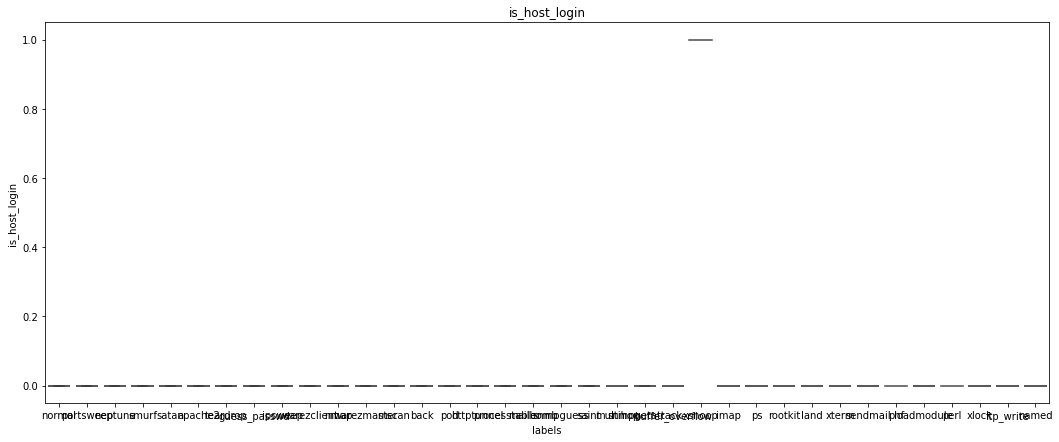

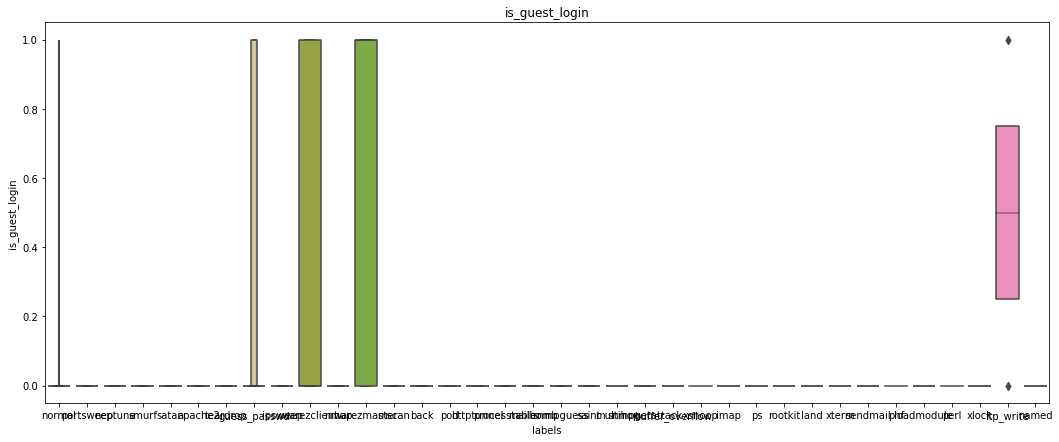

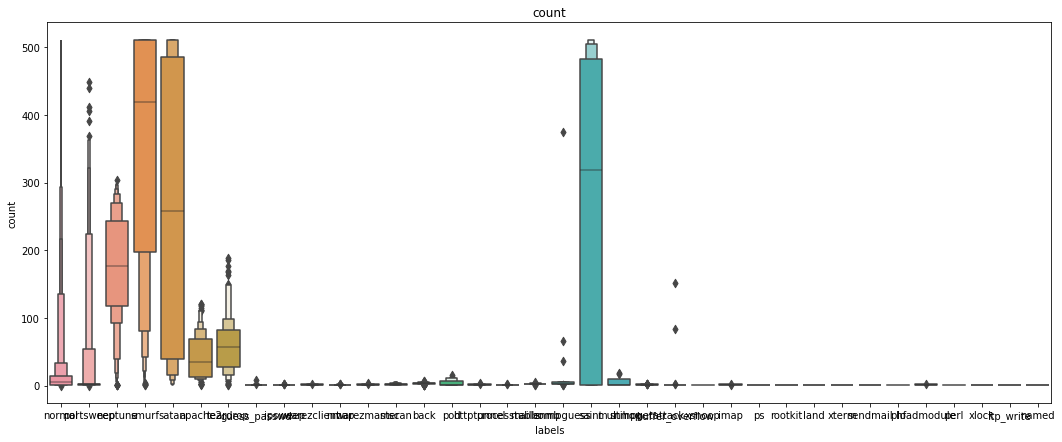

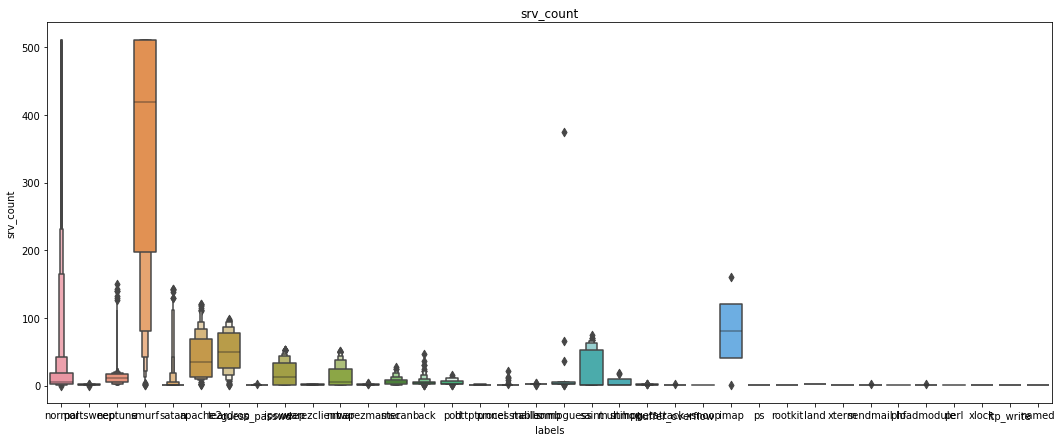

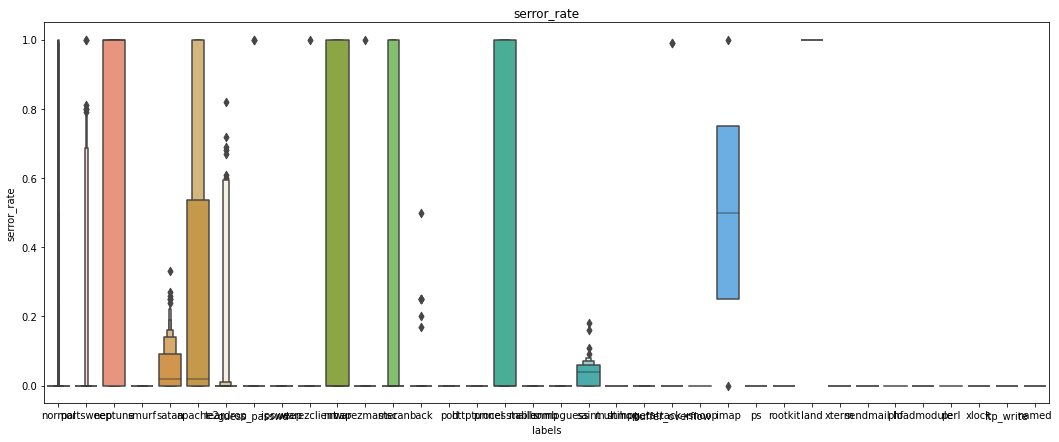

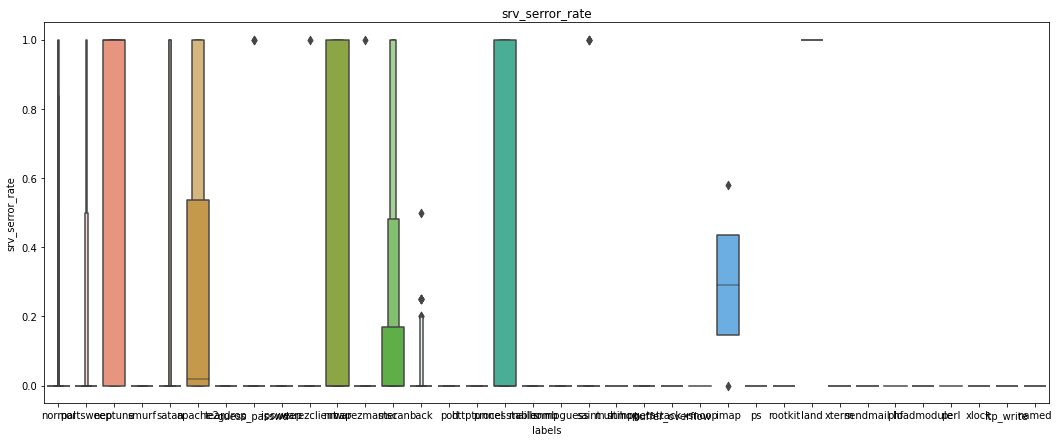

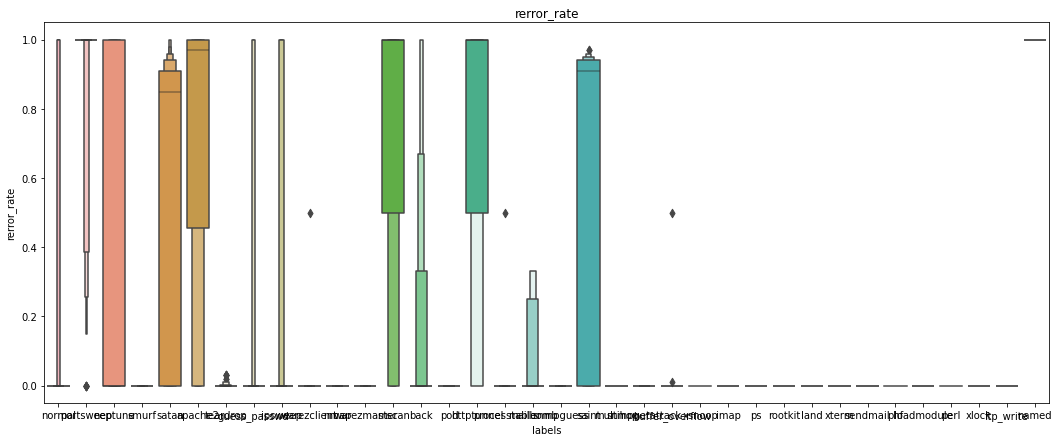

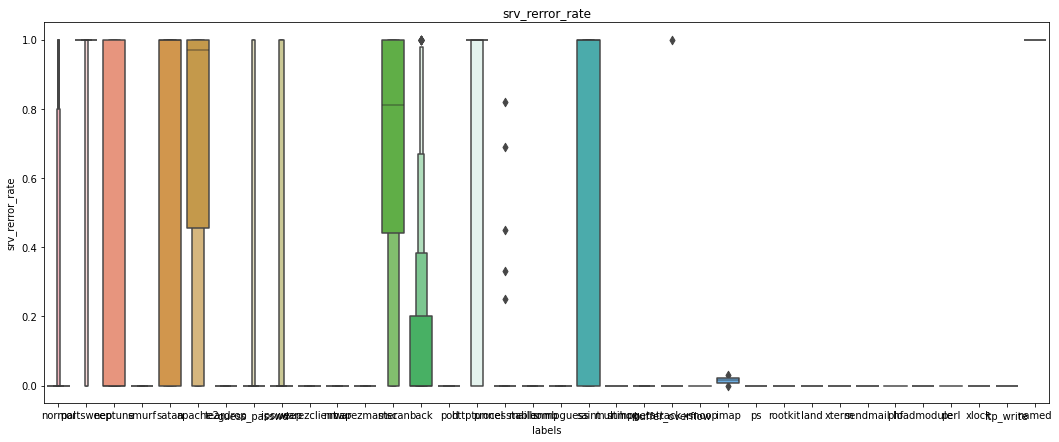

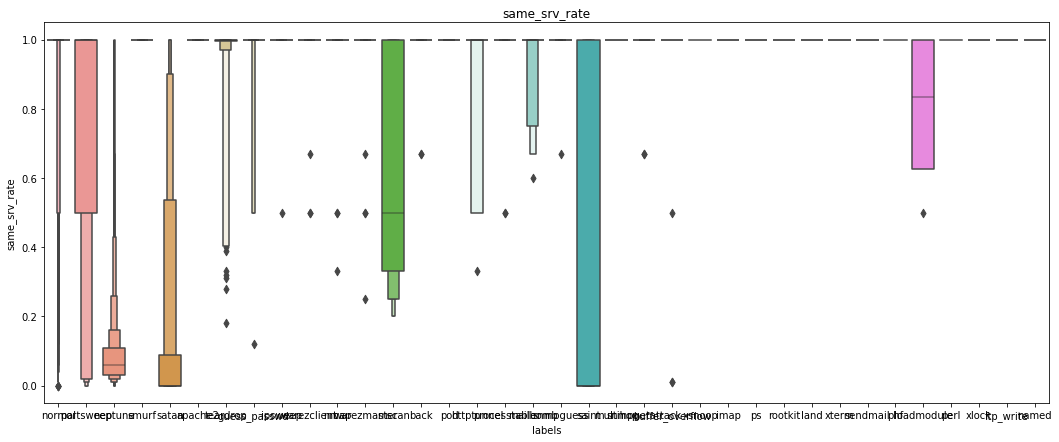

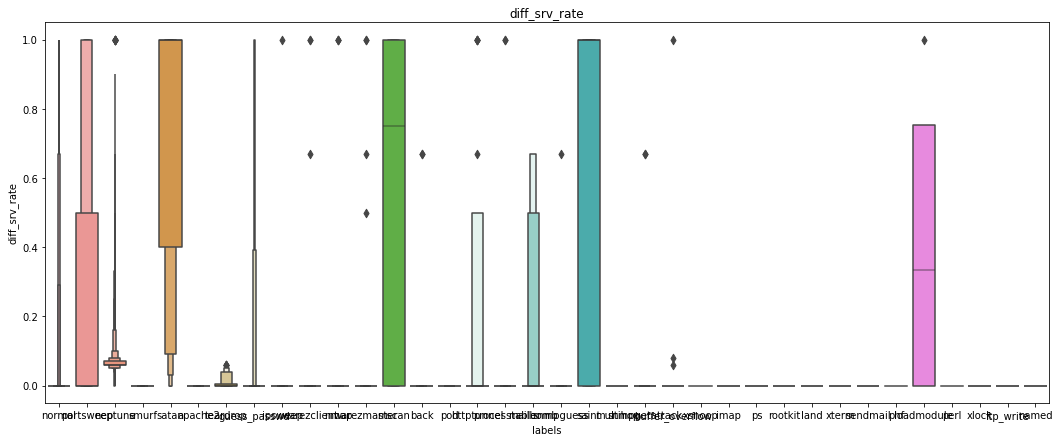

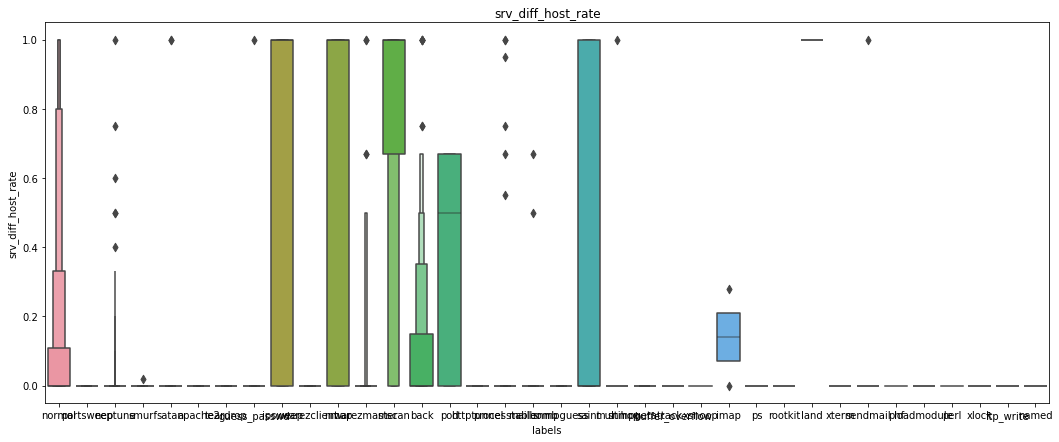

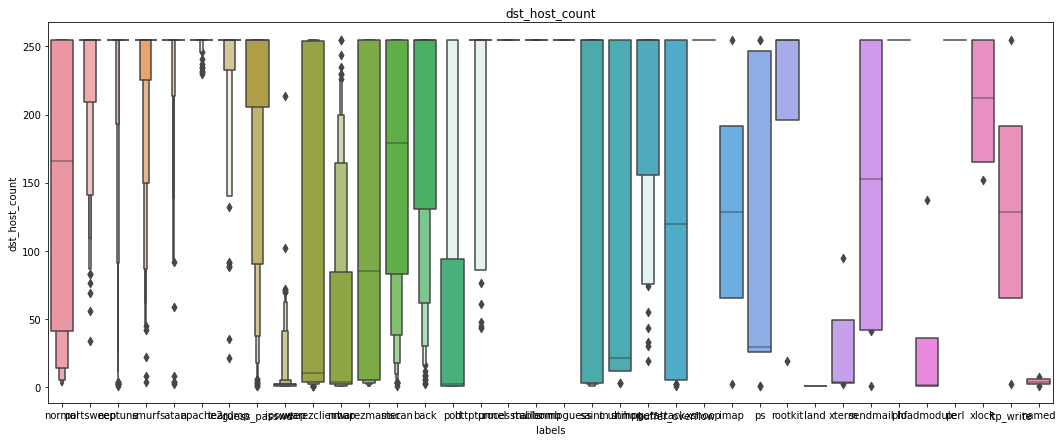

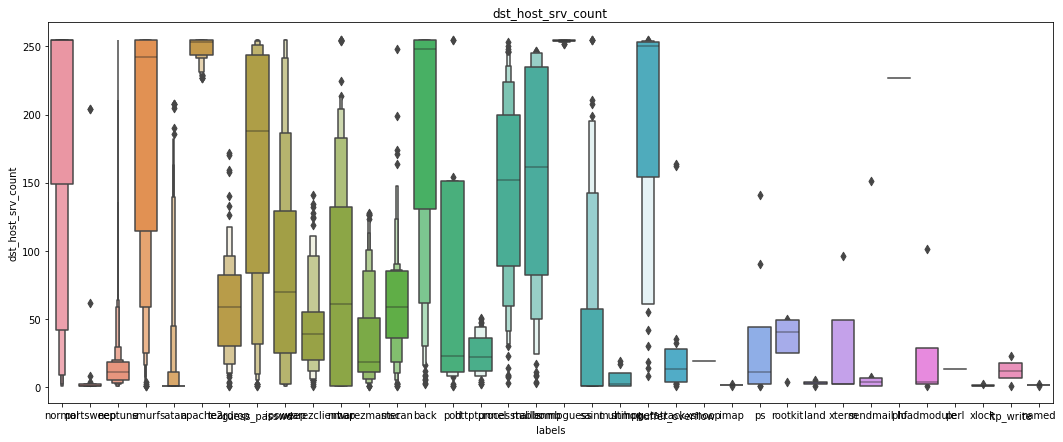

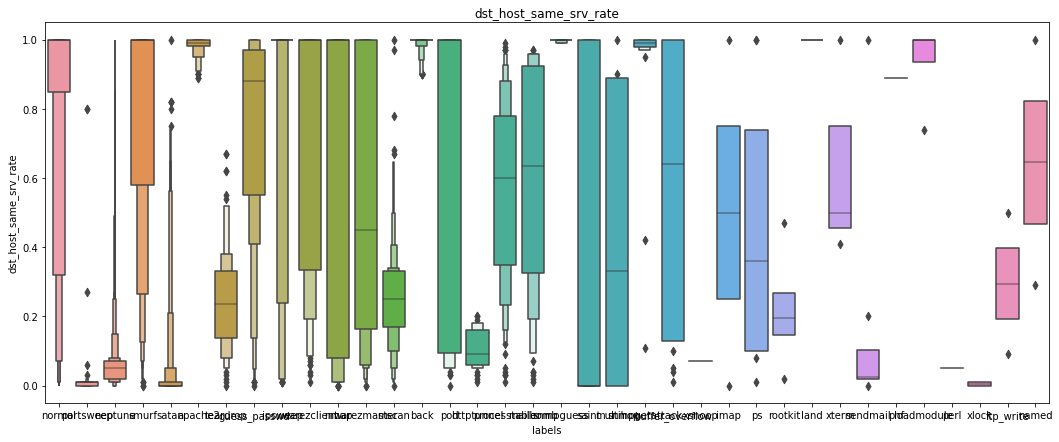

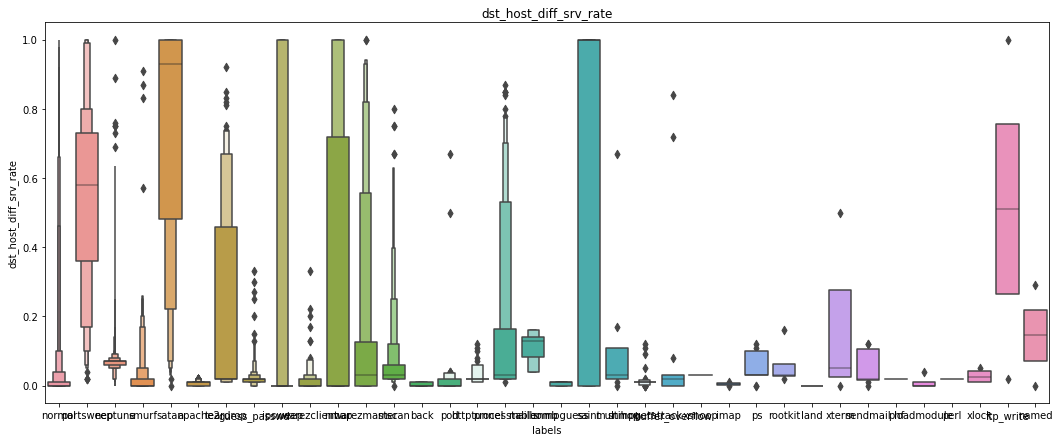

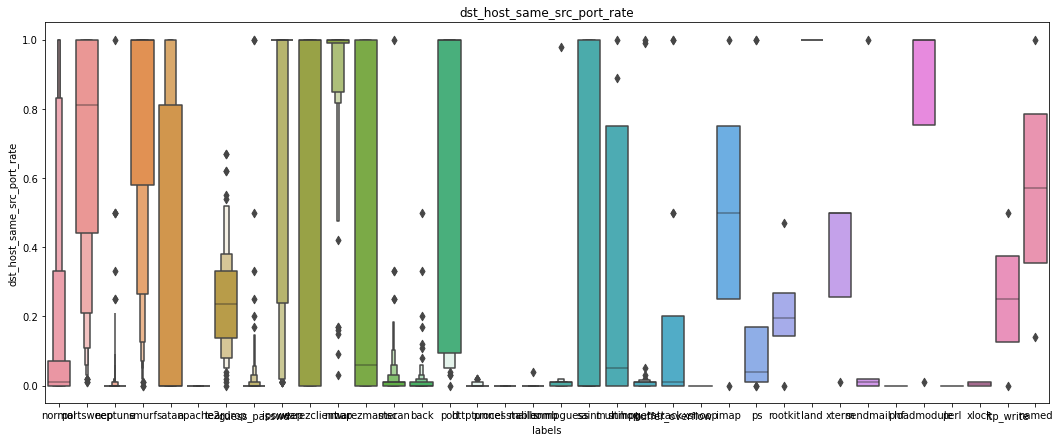

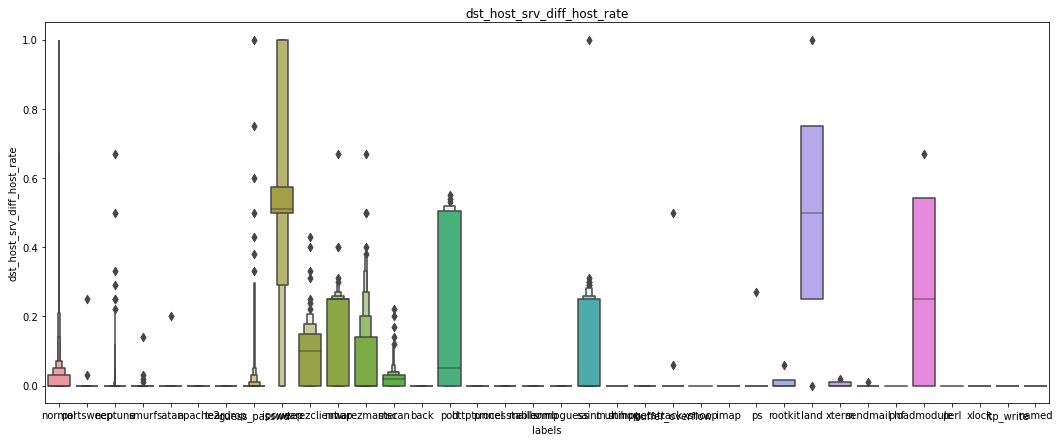

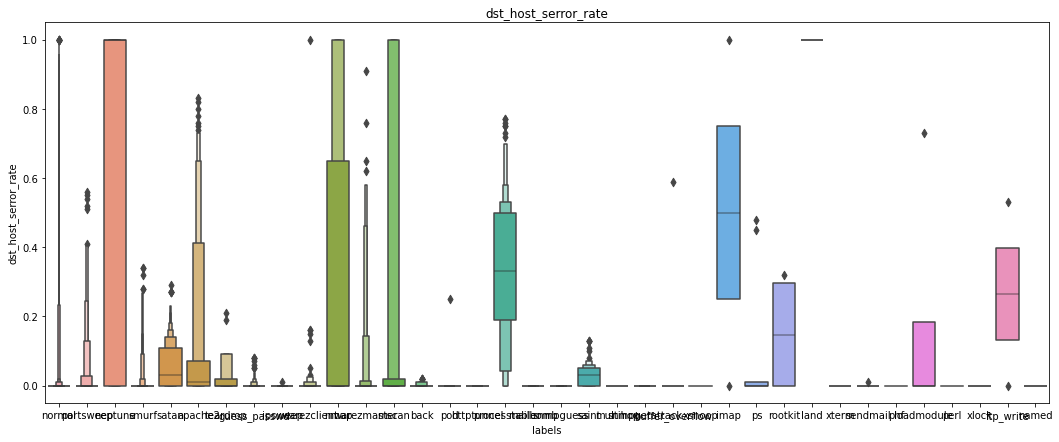

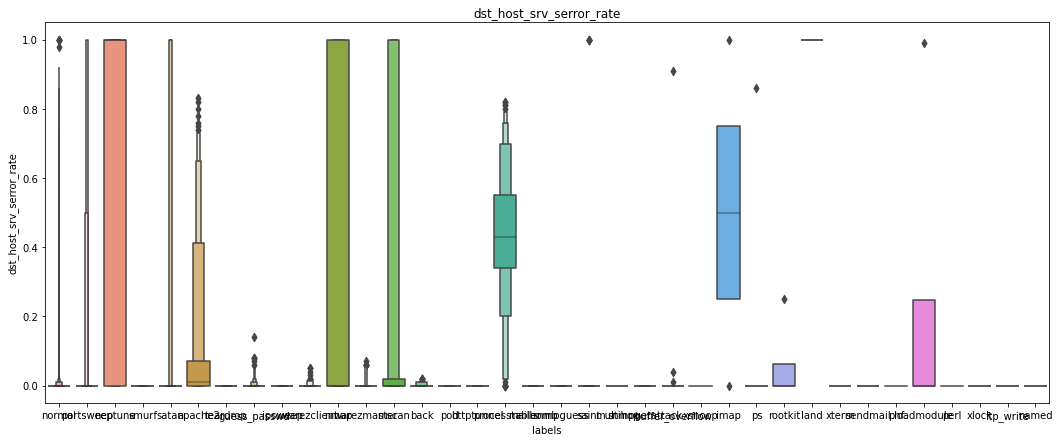

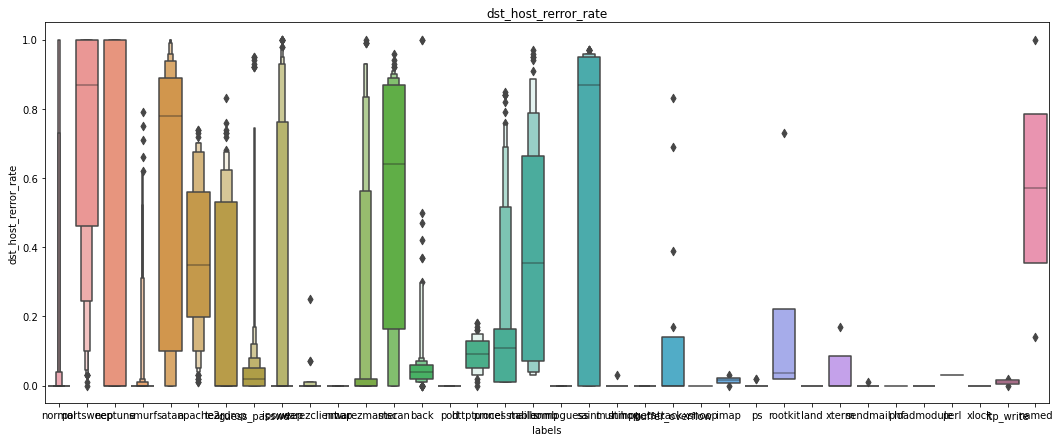

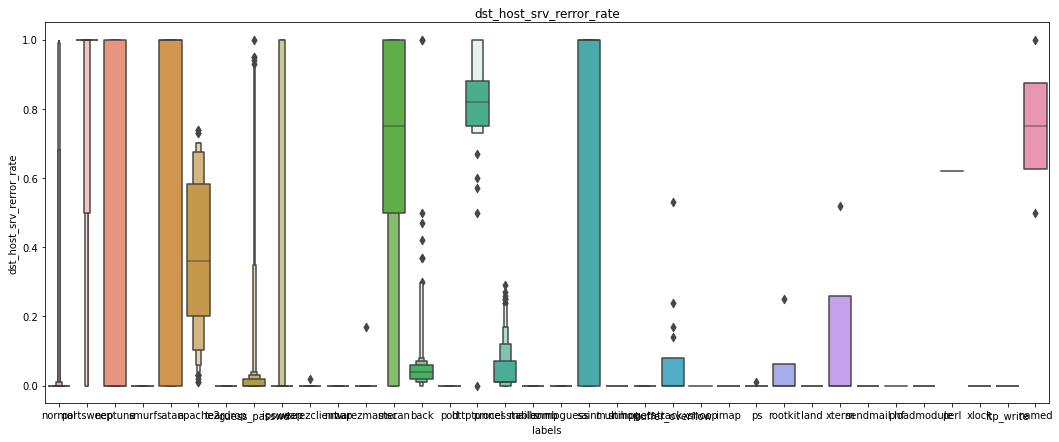

In [ ]:
#distribution boxenplots (per class)
for column in numeric_columns:
    plt.figure(figsize=(18,7))
    sns.boxenplot(x='labels', y=df[column], data=df);
    plt.title(column);
    #for label in labels:
    #    plt.figure(figsize=(18,7))
    #    sns.kdeplot(df[column][df['labels']==label]);
    #    plt.title(label);

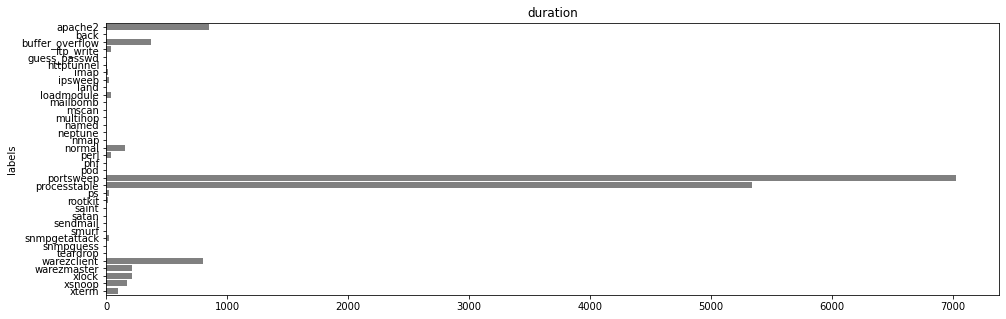

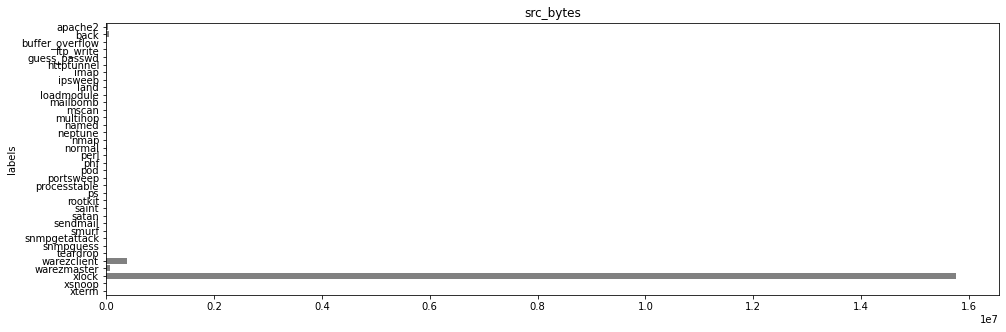

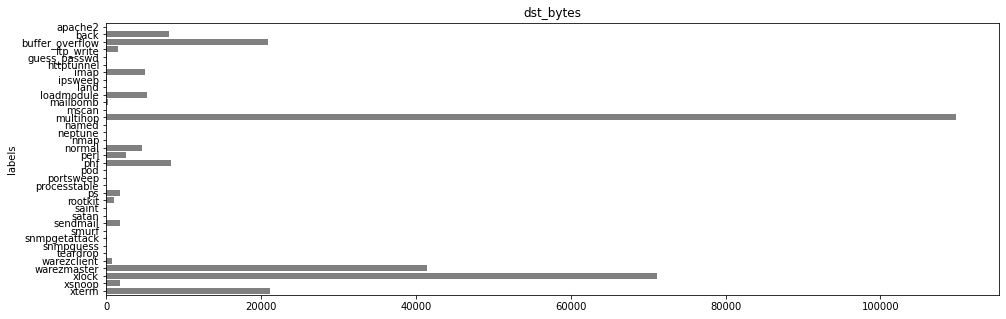

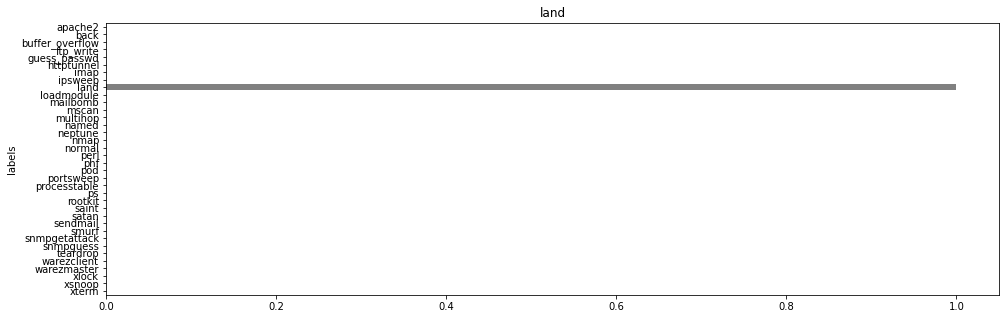

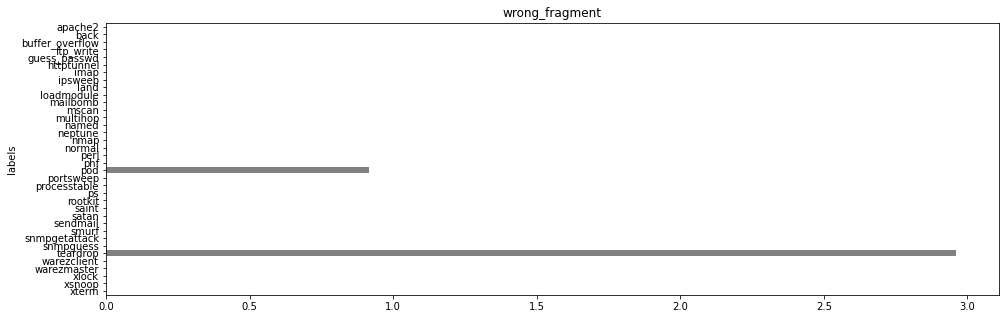

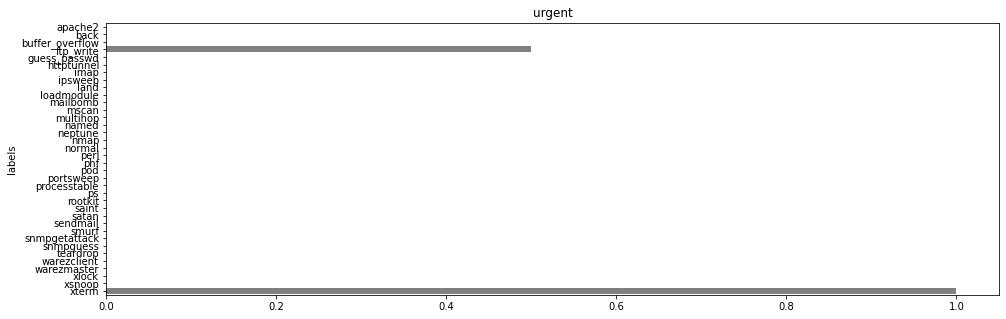

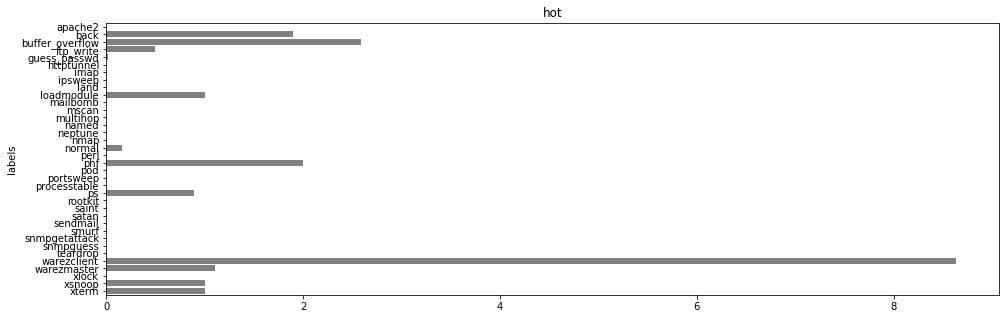

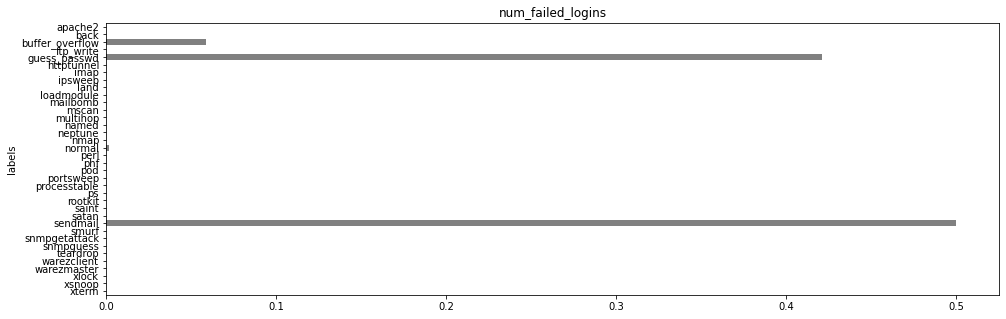

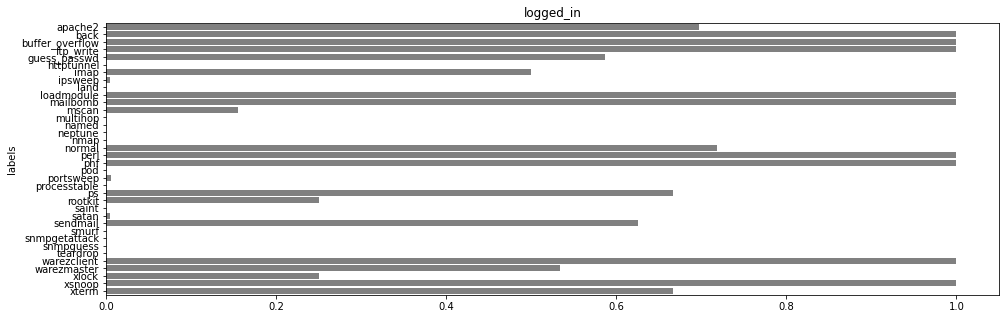

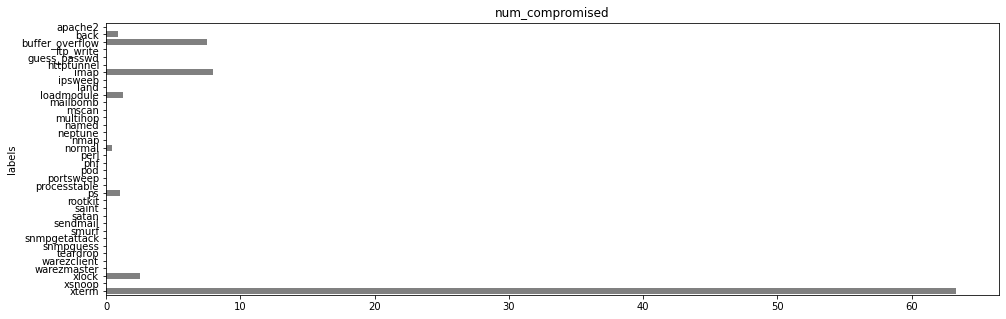

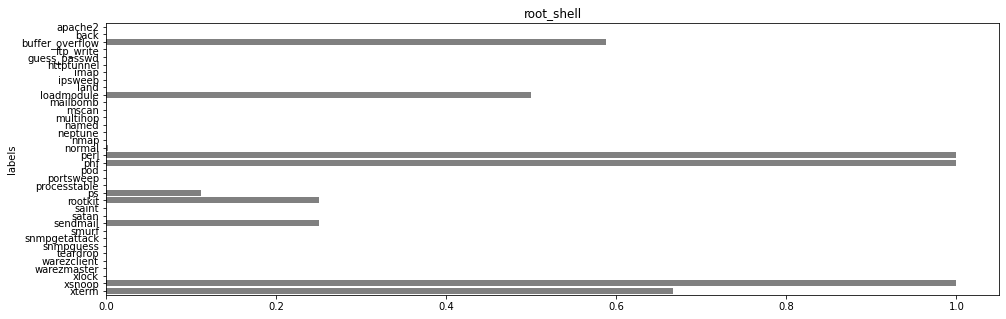

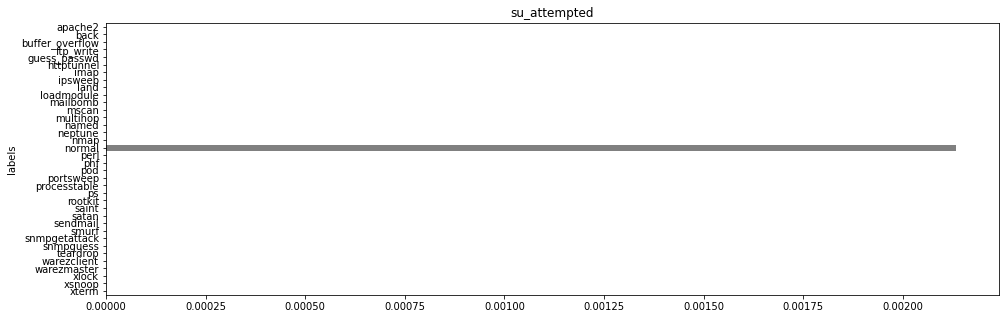

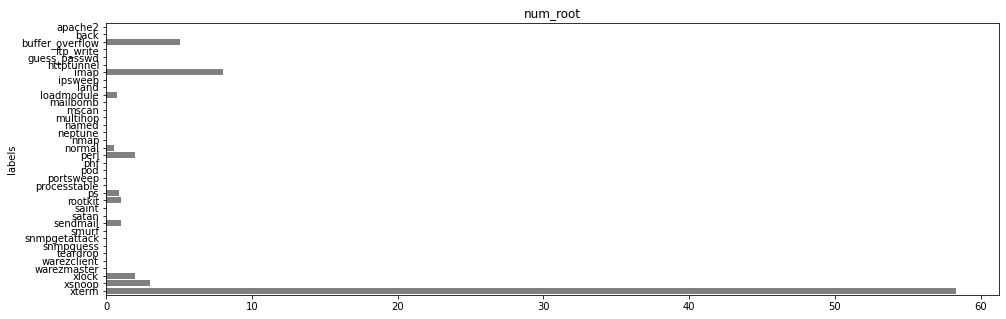

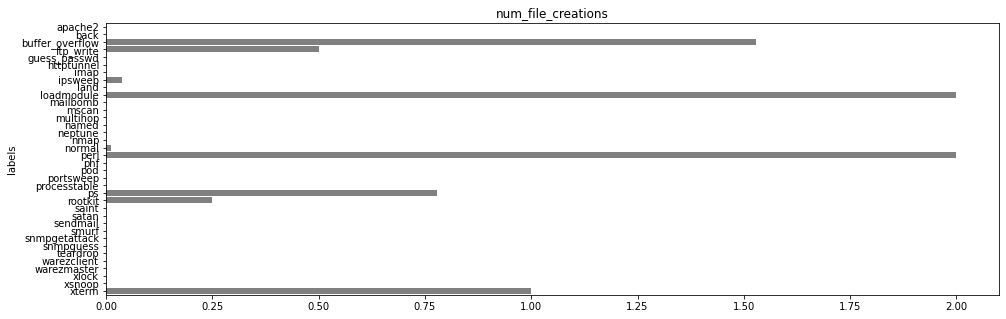

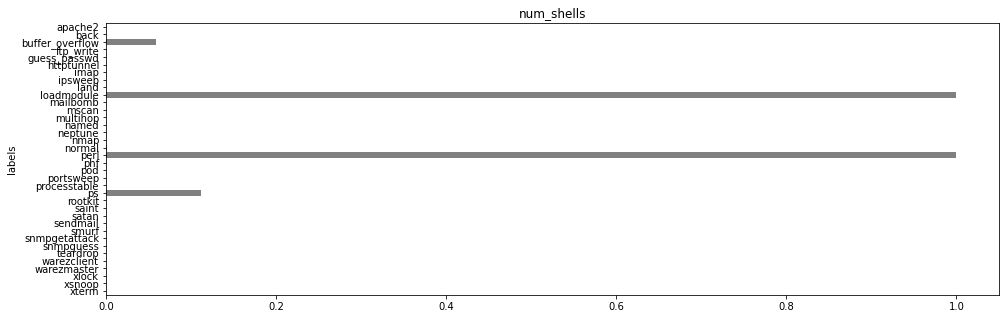

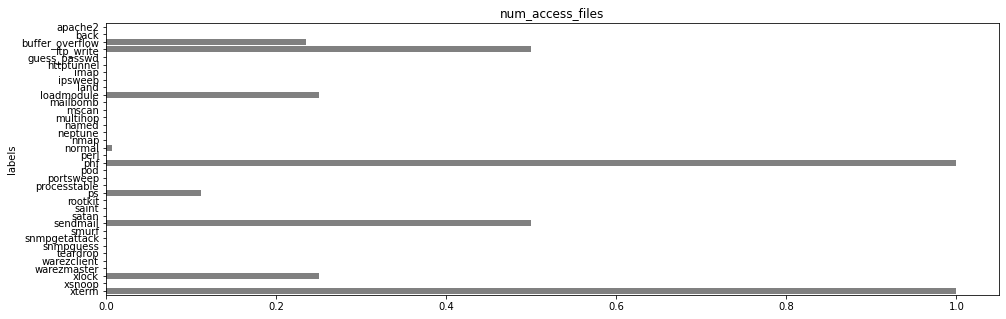

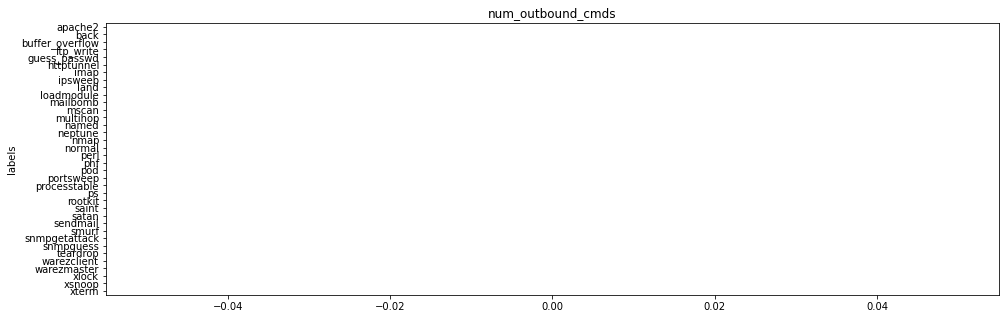

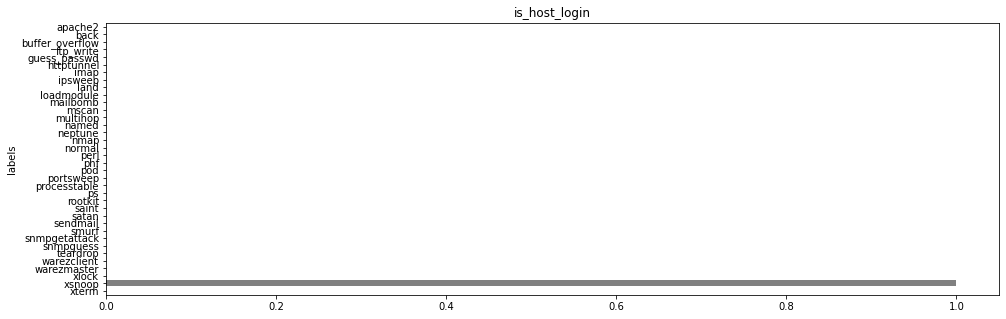

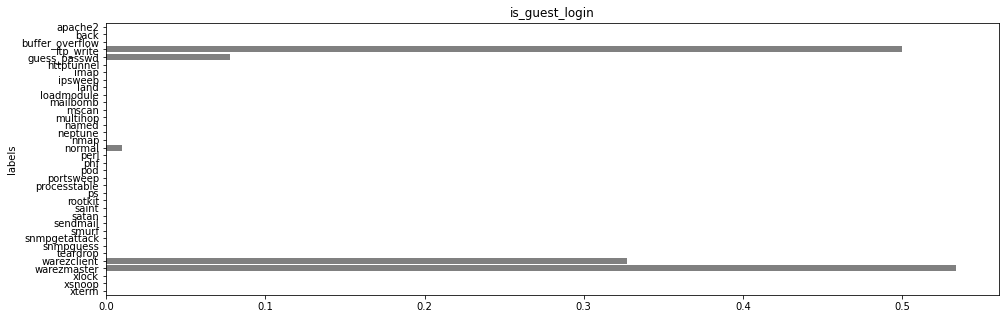

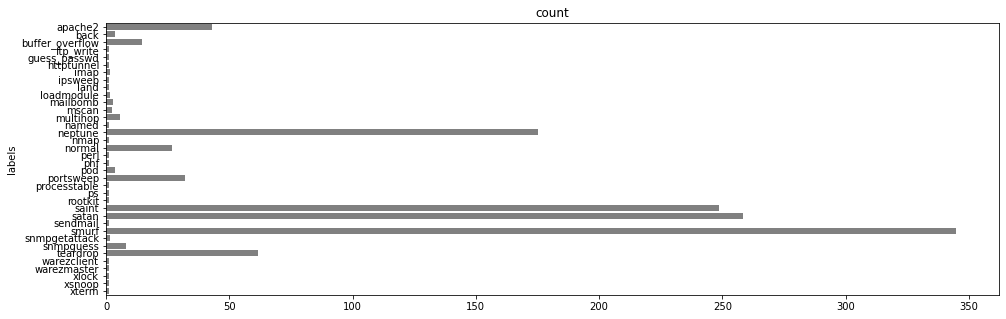

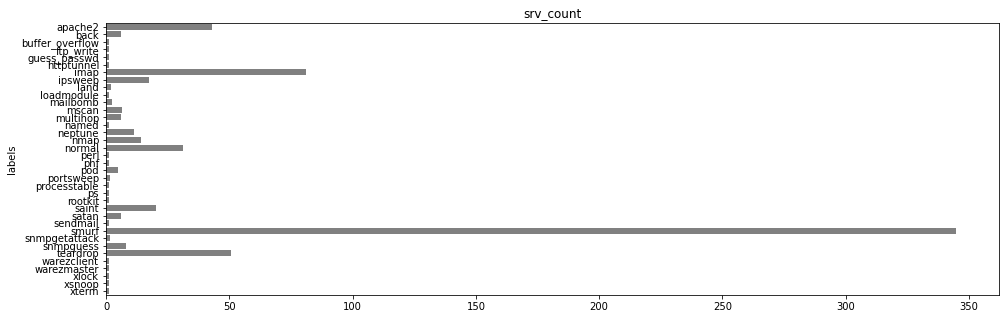

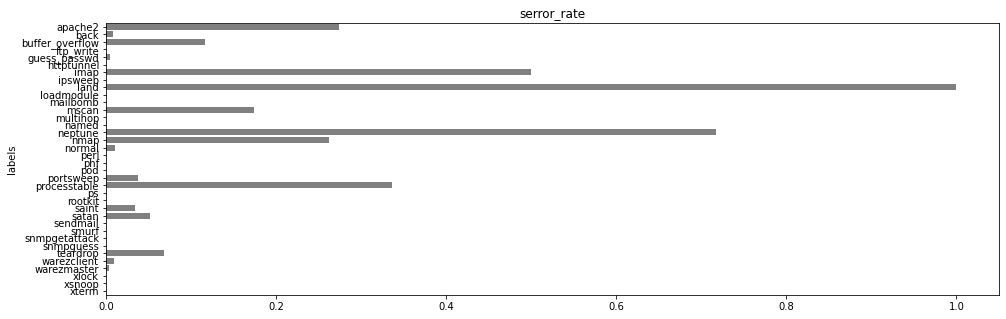

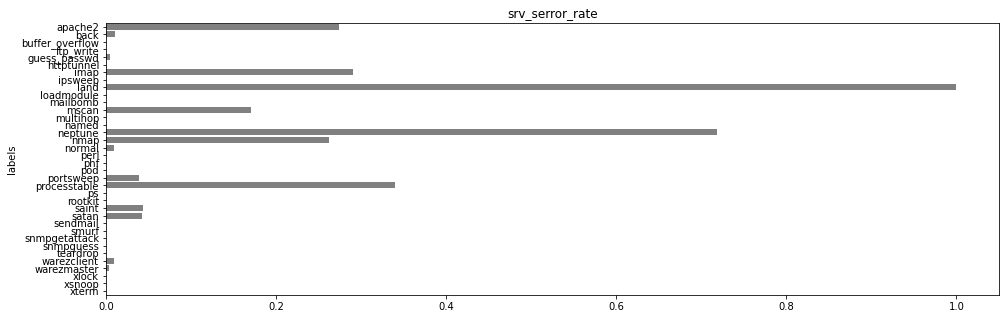

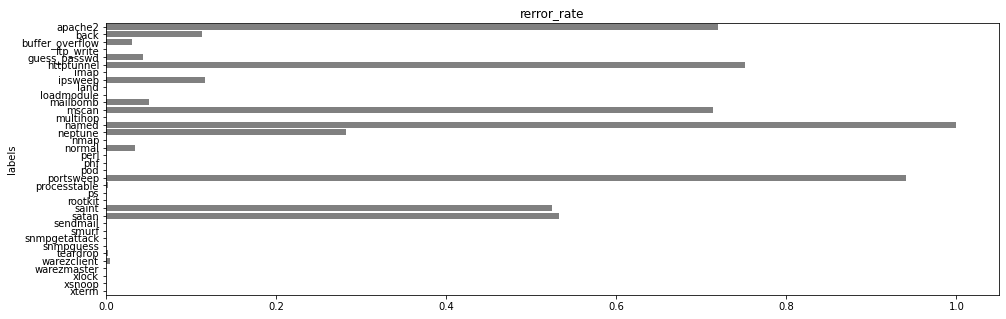

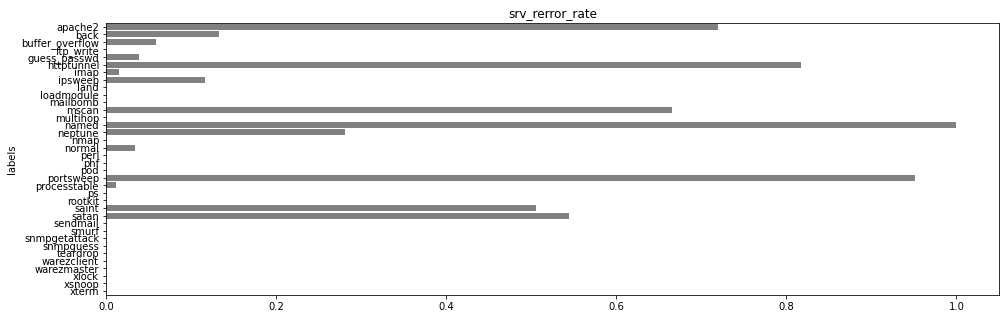

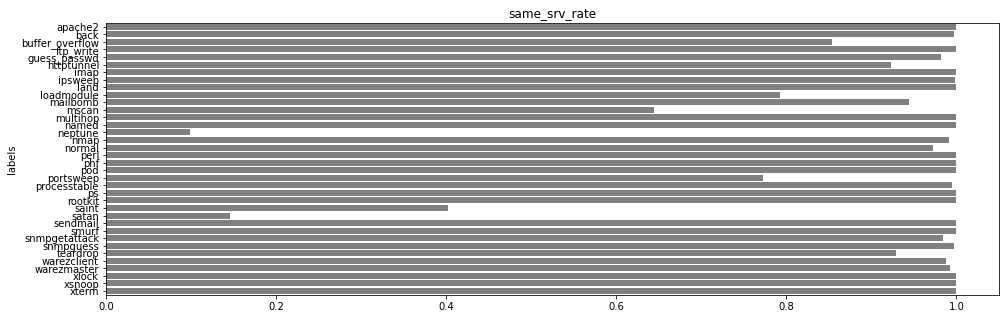

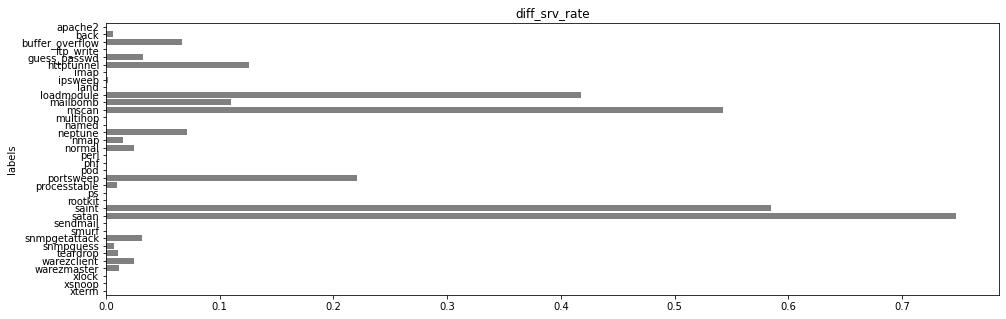

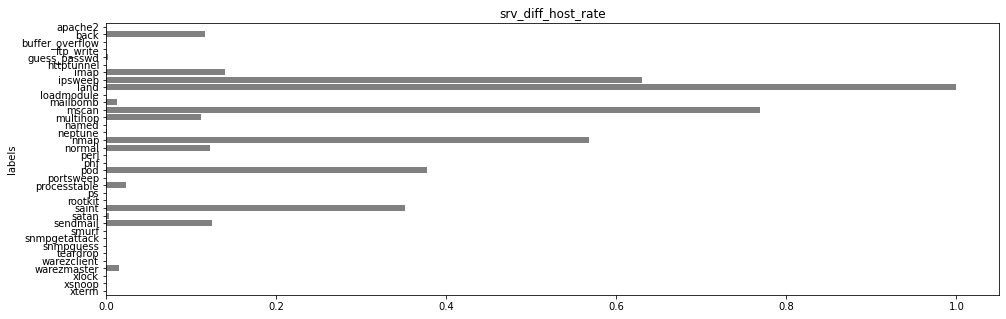

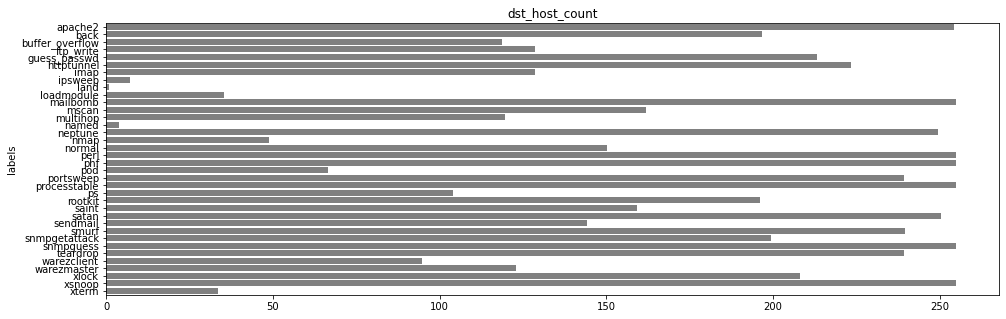

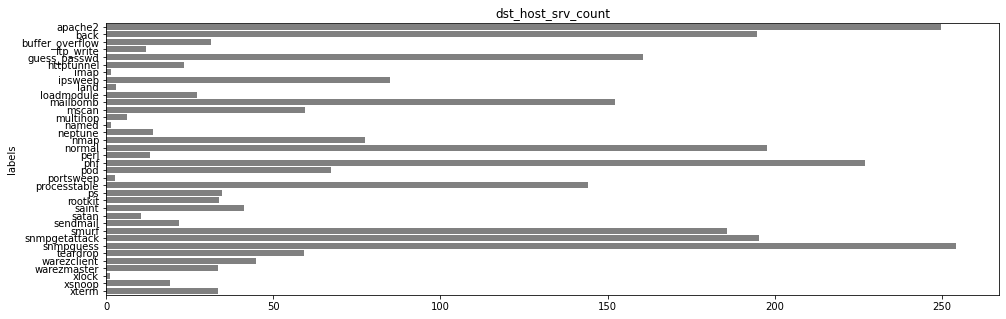

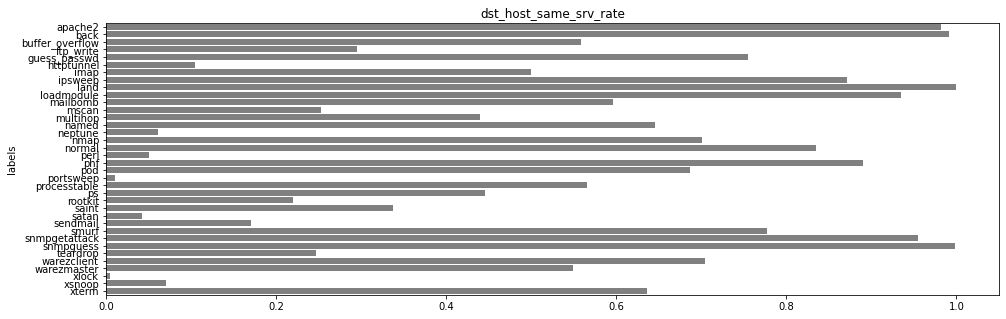

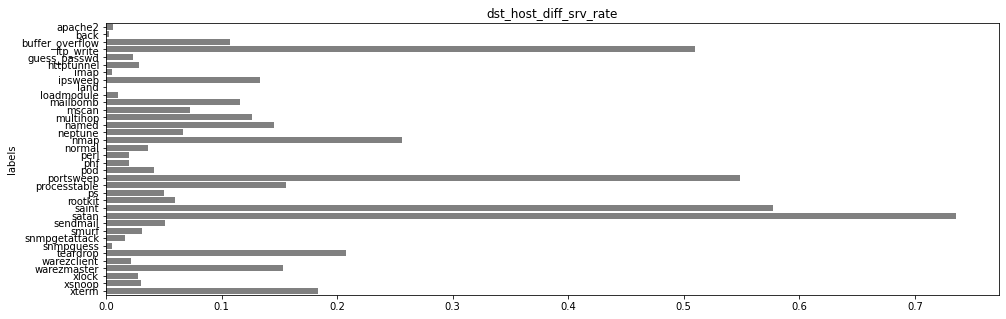

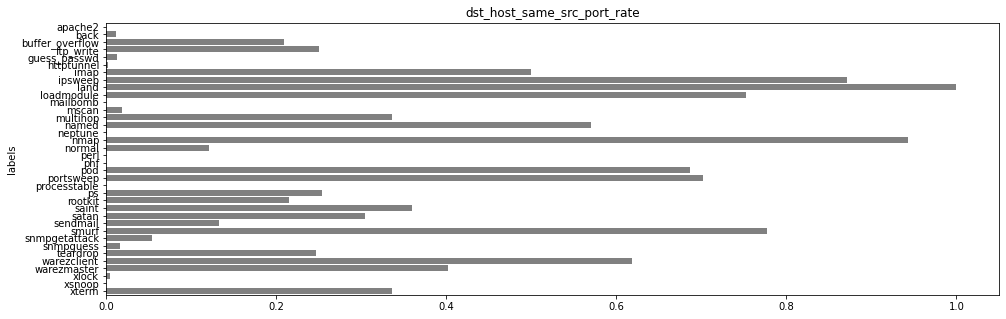

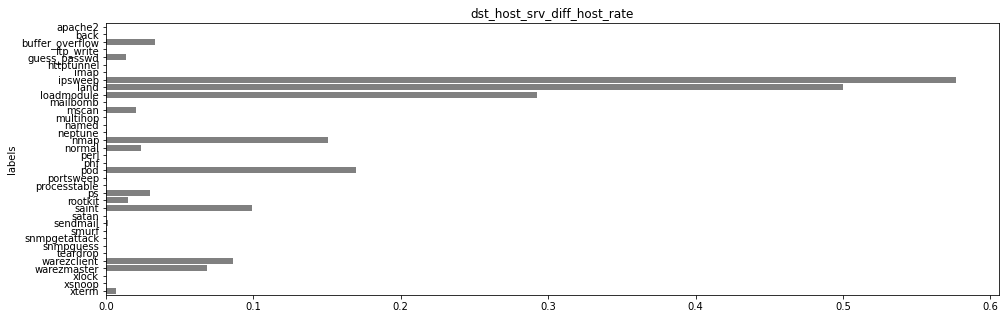

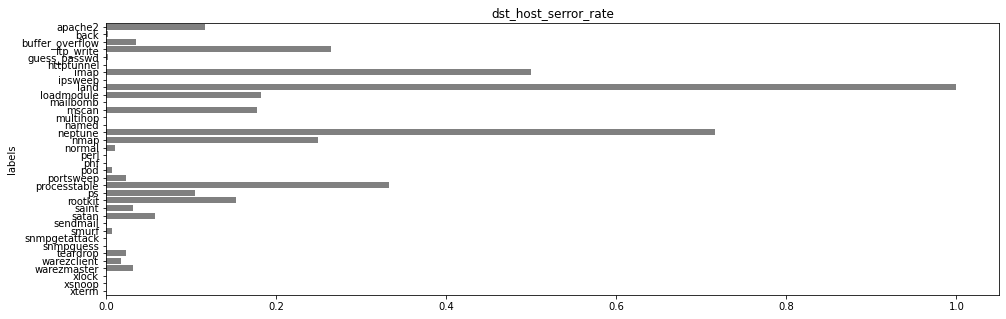

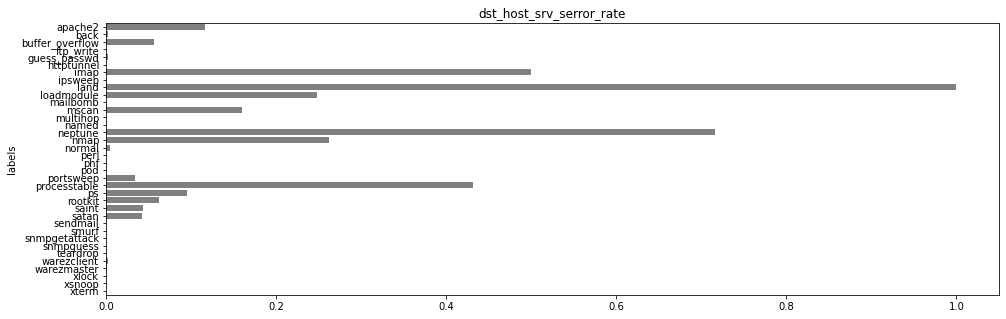

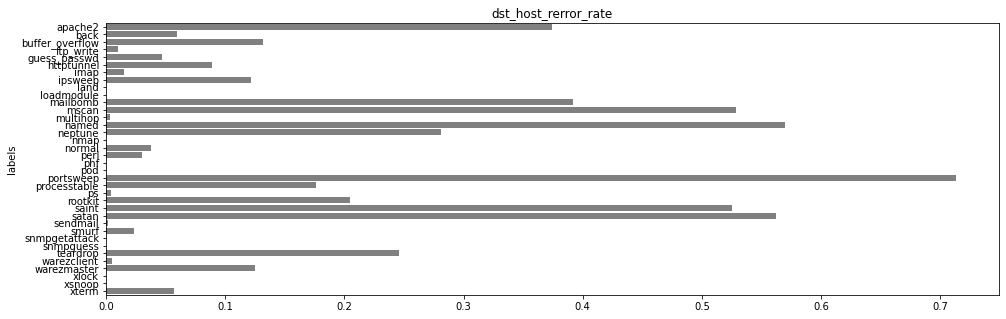

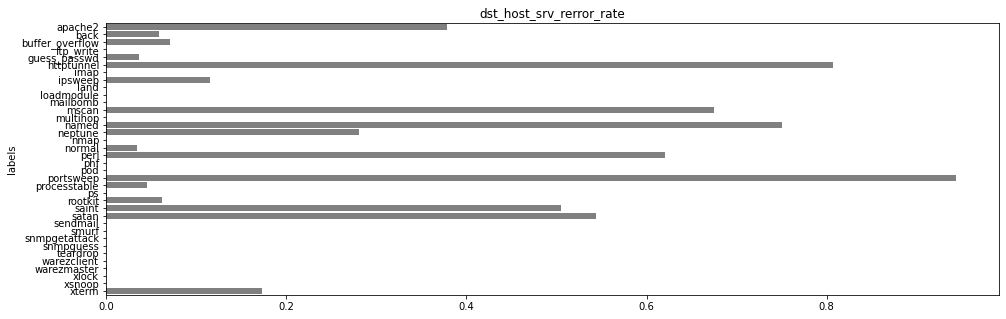

In [ ]:
#feature means (per class)
group_mean = df.groupby(by='labels').mean()
for column in numeric_columns:
    plt.figure(figsize=(16,5));
    sns.barplot(y=group_mean[column].squeeze().index, x=group_mean[column].squeeze().values, 
                color='Gray');
    plt.title(column);

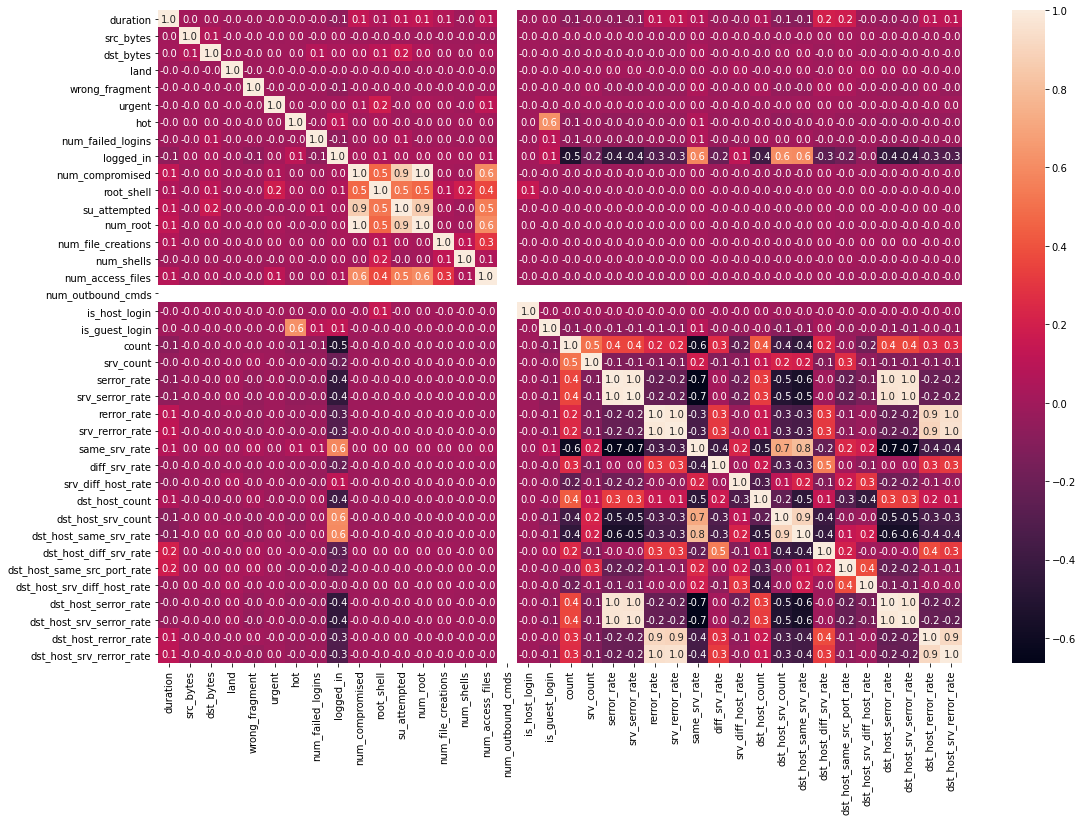

In [ ]:
#correlation heatmap
plt.figure(figsize=(18,12));
sns.heatmap(df.corr(), annot=True, fmt='1.1f');

In [ ]:
#column 'num_outbound_cmds' is zero everywhere, we will delete it
df.drop(columns='num_outbound_cmds', inplace=True)

#remove from list of numeric columns
numeric_columns.remove('num_outbound_cmds')

PCA visualization:

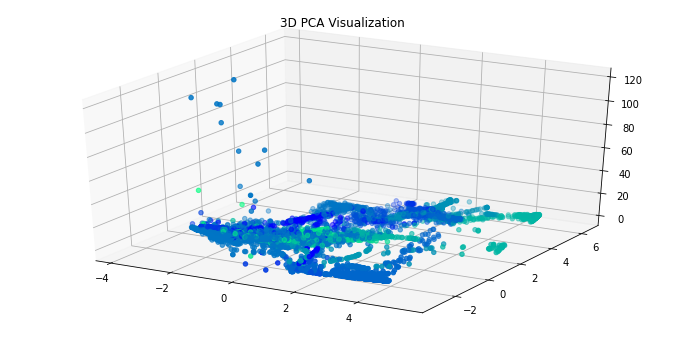

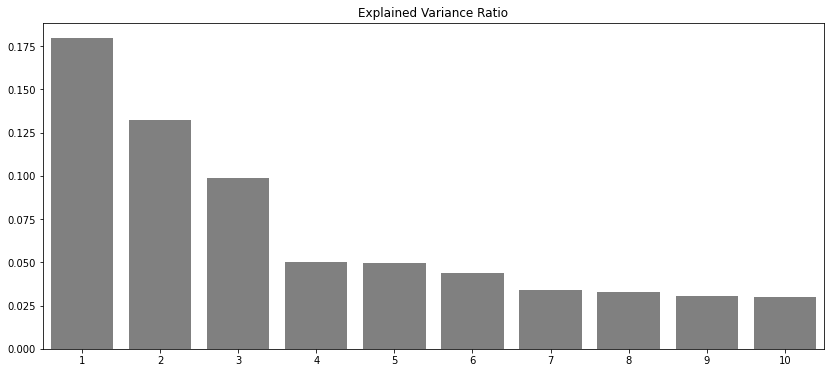

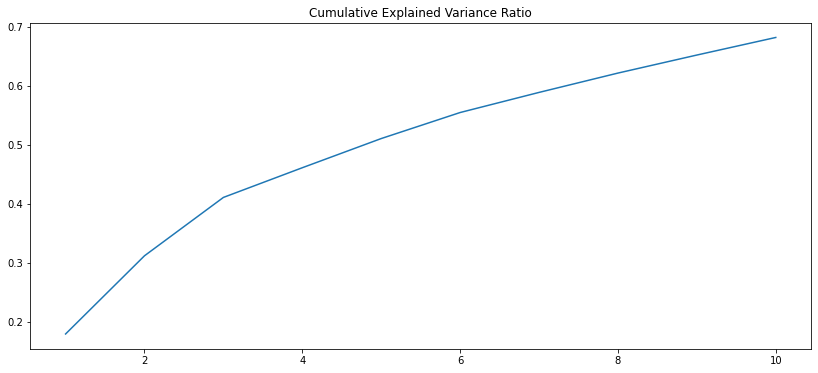

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.decomposition import PCA

#standardize data
df_num = df[numeric_columns].copy()
sc = StandardScaler()
df_num = sc.fit_transform(df_num)

#ordinalize labels
ordinal = OrdinalEncoder()
ord_labels = ordinal.fit_transform(df['labels'].values[:,np.newaxis])
ord_labels = np.squeeze(ord_labels.astype(int))

#PCA
pca = PCA(10)
df_pca = pca.fit_transform(df_num)

#PCA 3d-scatterplot
plt.figure(figsize=(12,6));
ax=plt.axes(projection='3d')
ax.scatter(df_pca[:,0], df_pca[:,1], df_pca[:,2], 
           c=ord_labels, cmap='winter');
plt.title('3D PCA Visualization');

#explained variance
var_index = np.arange(pca.explained_variance_.shape[0])+1
plt.figure(figsize=(14,6));
sns.barplot(x=var_index, y=pca.explained_variance_ratio_, color='gray');
plt.title('Explained Variance Ratio');
plt.figure(figsize=(14,6));
sns.lineplot(x=var_index, y=pca.explained_variance_ratio_.cumsum());
plt.title('Cumulative Explained Variance Ratio');

From the explained variance graphs we see that our 3-dimensional scatterplot captured only a small portion of the information. It would take at least 10-15 Principal Components to capture a meaningfull amount of the information. We could make a few more 3d scatterplots with other Principal Components but again, as seen in the explained variance graphs, these would offer far less insight than the first three components.

Time series graph

,class,label
0,apache2,0
1,back,1
2,buffer_overflow,2
3,ftp_write,3
4,guess_passwd,4
5,httptunnel,5
6,imap,6
7,ipsweep,7
8,land,8
9,loadmodule,9


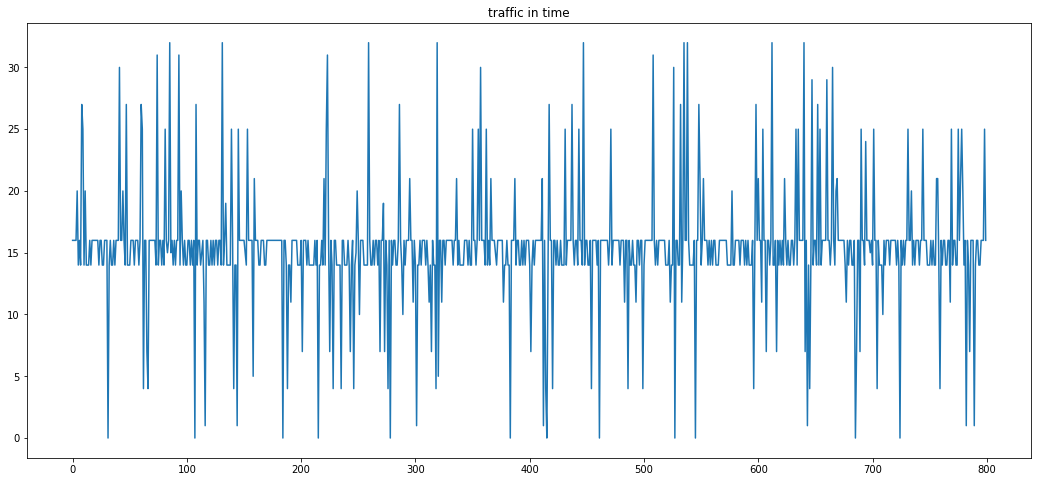

In [ ]:
from sklearn.preprocessing import LabelEncoder

enc = LabelEncoder()
y = enc.fit_transform(df['labels'])
x = np.arange(y.shape[0])

plt.figure(figsize=(18,8));
sns.lineplot(x=x[:800], y=y[:800]); #for visual clarity, only a small slice is selected
plt.title('traffic in time')

class_labels = pd.DataFrame(data=enc.classes_,columns=['class'])
class_labels['label'] = np.unique(y)
display(class_labels)

### CNN Classification

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv1D, MaxPool1D, Flatten, Dense, BatchNormalization, Dropout
#from tensorflow.keras.layers.core import Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import accuracy_score, f1_score
#from tensorflow.keras.metrics import 

We'll try both multiclass and binary classification. In the case of binary, we will cluster all malicious data in a single class, using the 'binary_class' variable that we created earlier.

First, let's prepare the data

In [ ]:
from sklearn.preprocessing import StandardScaler

dummies = pd.get_dummies(df[categorical_columns])
x = pd.concat((df[numeric_columns], dummies), axis=1).values

enc_bin = LabelEncoder()
y_bin = enc_bin.fit_transform(binary_class)
enc_multi = LabelEncoder()
y_multi = enc_multi.fit_transform(df['labels'].values)

# for manual train_test_split, splitting indices instead of actual values
np.random.RandomState(seed=0)
train_indexes = np.random.choice(np.arange(x.shape[0]), size=x.shape[0]*8//10, replace=False)
test_indexes = np.delete(np.arange(x.shape[0]), np.arange(x.shape[0])[train_indexes])
print('train size:', train_indexes.shape[0])
print('test size:  ', test_indexes.shape[0])

x_tr = x[train_indexes]
x_ts = x[test_indexes]
y_bin_tr =y_bin[train_indexes]
y_bin_ts =y_bin[test_indexes]
y_multi_tr = y_multi[train_indexes]
y_multi_ts = y_multi[test_indexes]

# scale x
sc=StandardScaler()
x_tr = sc.fit_transform(x_tr)
x_ts = sc.transform(x_ts)

#make x 3-dimensional for the CNN to process
x_tr = x_tr[:,:,np.newaxis]
x_ts = x_ts[:,:,np.newaxis]

train size: 18035
test size:   4509


##### Binary Classification

In [ ]:
model=Sequential()
model.add(Conv1D(128,2, activation='relu',input_shape=x_tr[0].shape))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.2))

model.add(Conv1D(256,2, activation='relu'))
model.add(BatchNormalization())
model.add(MaxPool1D(2))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.4))

model.add(Dense(1,activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d (Conv1D)              (None, 116, 128)          384       
_________________________________________________________________
batch_normalization (BatchNo (None, 116, 128)          512       
_________________________________________________________________
max_pooling1d (MaxPooling1D) (None, 58, 128)           0         
_________________________________________________________________
dropout (Dropout)            (None, 58, 128)           0         
_________________________________________________________________
conv1d_1 (Conv1D)            (None, 57, 256)           65792     
_________________________________________________________________
batch_normalization_1 (Batch (None, 57, 256)           1024      
_________________________________________________________________
max_pooling1d_1 (MaxPooling1 (None, 28, 256)           0

In [ ]:
early_stop = EarlyStopping(patience=5,verbose=1)
model.fit(x_tr, y_bin_tr, epochs=50, validation_split=0.1, batch_size=16, callbacks=[early_stop])

Epoch 1/50
1015/1015 [==============================] - 34s 31ms/step - loss: 0.3078 - accuracy: 0.9170 - val_loss: 0.1017 - val_accuracy: 0.9667
Epoch 2/50
1015/1015 [==============================] - 31s 31ms/step - loss: 0.1143 - accuracy: 0.9562 - val_loss: 0.0995 - val_accuracy: 0.9612
Epoch 3/50
1015/1015 [==============================] - 32s 31ms/step - loss: 0.1050 - accuracy: 0.9578 - val_loss: 0.0986 - val_accuracy: 0.9551
Epoch 4/50
1015/1015 [==============================] - 31s 31ms/step - loss: 0.0899 - accuracy: 0.9635 - val_loss: 0.0947 - val_accuracy: 0.9690
Epoch 5/50
1015/1015 [==============================] - 32s 31ms/step - loss: 0.0899 - accuracy: 0.9616 - val_loss: 0.0854 - val_accuracy: 0.9662
Epoch 6/50
1015/1015 [==============================] - 31s 31ms/step - loss: 0.0837 - accuracy: 0.9653 - val_loss: 0.0755 - val_accuracy: 0.9762
Epoch 7/50
1015/1015 [==============================] - 31s 31ms/step - loss: 0.0772 - accuracy: 0.9667 - val_loss: 0.0786 -

In [ ]:
pred = model.predict(x_ts)
pred_d = []
for prediction in pred:
    if prediction <0.5:
        pred_d.append(0)
    else:
        pred_d.append(1)
        
pred = np.array(pred_d)
print('accuracy:', accuracy_score(y_bin_ts, pred))
print('f1-score:', f1_score(y_bin_ts, pred, average='macro'))

accuracy: 0.9795963628298958
f1-score: 0.9795780563796643


##### Multiclass Classification

In [ ]:
model1=Sequential()
model1.add(Conv1D(180,2, activation='relu',input_shape=x_tr[0].shape))
model1.add(BatchNormalization())
model1.add(MaxPool1D(2))
model1.add(Dropout(0.2))

model1.add(Conv1D(300,2, activation='relu'))
model1.add(BatchNormalization())
model1.add(MaxPool1D(2))
model1.add(Dropout(0.4))

model1.add(Flatten())
model1.add(Dense(256, activation='relu'))
model1.add(Dropout(0.4))

model1.add(Dense(len(np.unique(enc.classes_)),activation='softmax'))

model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
model1.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_10 (Conv1D)           (None, 116, 180)          540       
_________________________________________________________________
batch_normalization_10 (Batc (None, 116, 180)          720       
_________________________________________________________________
max_pooling1d_10 (MaxPooling (None, 58, 180)           0         
_________________________________________________________________
dropout_15 (Dropout)         (None, 58, 180)           0         
_________________________________________________________________
conv1d_11 (Conv1D)           (None, 57, 300)           108300    
_________________________________________________________________
batch_normalization_11 (Batc (None, 57, 300)           1200      
_________________________________________________________________
max_pooling1d_11 (MaxPooling (None, 28, 300)          

In [ ]:
#early_stop = EarlyStopping(patience=4,verbose=1)
model1.fit(x_tr, y_multi_tr, epochs=30, validation_split=0.1, batch_size=16, callbacks=[early_stop])

Epoch 1/30
1015/1015 [==============================] - 56s 54ms/step - loss: 0.8879 - accuracy: 0.8527 - val_loss: 0.3307 - val_accuracy: 0.9340
Epoch 2/30
1015/1015 [==============================] - 55s 54ms/step - loss: 0.3146 - accuracy: 0.9184 - val_loss: 0.2839 - val_accuracy: 0.9429
Epoch 3/30
1015/1015 [==============================] - 55s 54ms/step - loss: 0.2546 - accuracy: 0.9338 - val_loss: 0.2179 - val_accuracy: 0.9435
Epoch 4/30
1015/1015 [==============================] - 55s 54ms/step - loss: 0.2364 - accuracy: 0.9295 - val_loss: 0.2195 - val_accuracy: 0.9501
Epoch 5/30
1015/1015 [==============================] - 55s 54ms/step - loss: 0.2429 - accuracy: 0.9375 - val_loss: 0.2176 - val_accuracy: 0.9501
Epoch 6/30
1015/1015 [==============================] - 55s 54ms/step - loss: 0.2252 - accuracy: 0.9363 - val_loss: 0.1724 - val_accuracy: 0.9523
Epoch 7/30
1015/1015 [==============================] - 55s 54ms/step - loss: 0.2095 - accuracy: 0.9402 - val_loss: 0.1815 -

In [ ]:
pred = model1.predict(x_ts)
pred = np.argmax(pred,axis=1)

print('accuracy:', accuracy_score(y_multi_ts, pred))
print('f1-score:', f1_score(y_multi_ts, pred, average='weighted'))

accuracy: 0.9709469948990908
f1-score: 0.964735983387867
